**CIS-662: Introduction to Machine Learning and Algorithms**

**Final Project - Spring 2024**

**Syracuse Flight Arrival Delay Prediction Using Machine Learning Models**

Akshaya Ganesan                                                                                                                 
aganes02@syr.edu
  
Sanjay Santhanam                                                                                                                 
ssanthan@syr.edu  

Nimeesh Nilesh Bagwe                                                                                                             
nibagwe@syr.edu
 
Uday Vempalli                                                                                                                   
uvempall@syr.edu

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.options.display.float_format = '{:,.2f}'.format

#Setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML

**Data Loading**

Here, we load the datasets required for our analysis into Pandas DataFrames. We have separate datasets for weather information from different airports and flight details. Using the read_excel function, we read these datasets from their respective Excel files into Pandas DataFrames

In [2]:
# Import the ord weather dataset as a dataframe
ord_weather = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Dataset/hourly_weather_data_ord.xlsx')
ord_weather.head()

,date,temperature_2m,rain,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_gusts_10m,airport
0,2017-01-01 05:00:00,24.60,0.00,0.00,0.03,0.00,6.73,12.08,ORD
1,2017-01-01 06:00:00,23.88,0.00,0.00,0.03,0.00,5.22,11.63,ORD
2,2017-01-01 07:00:00,23.16,0.00,0.00,0.03,0.00,4.34,9.40,ORD
3,2017-01-01 08:00:00,22.35,0.00,0.00,0.03,0.00,3.50,7.61,ORD
4,2017-01-01 09:00:00,22.08,0.00,0.00,0.03,0.00,4.16,6.71,ORD


In [3]:
#Import the jfk weather dataset as a dataframe
jfk_weather = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Dataset/hourly_weather_data_jfk.xlsx')
jfk_weather.head()

,date,temperature_2m,rain,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_gusts_10m,airport
0,2017-01-01 04:00:00,43.07,0.00,0.00,0.00,77.70,12.22,20.36,JFK
1,2017-01-01 05:00:00,43.79,0.00,0.00,0.00,71.70,13.78,22.59,JFK
2,2017-01-01 06:00:00,43.97,0.00,0.00,0.00,93.30,15.09,25.28,JFK
3,2017-01-01 07:00:00,42.98,0.01,0.00,0.00,52.80,13.35,25.28,JFK
4,2017-01-01 08:00:00,43.16,0.00,0.00,0.00,32.10,13.43,22.59,JFK


In [4]:
#Import the mco weather as a dataframe
mco_weather = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Dataset/hourly_weather_data_mco.xlsx')
mco_weather.head()

,date,temperature_2m,rain,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_gusts_10m,airport
0,2017-01-01 04:00:00,60.43,0.00,0,0,9.00,5.65,9.62,MCO
1,2017-01-01 05:00:00,60.43,0.00,0,0,7.20,5.00,9.84,MCO
2,2017-01-01 06:00:00,59.26,0.00,0,0,0.00,4.74,8.05,MCO
3,2017-01-01 07:00:00,59.35,0.00,0,0,0.00,5.27,8.95,MCO
4,2017-01-01 08:00:00,59.26,0.00,0,0,0.00,5.63,9.40,MCO


In [5]:
#Import the syr weather dataset as a dataframe
syr_weather = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Dataset/hourly_weather_data_syracuse.xlsx')
syr_weather.head()

,date,temperature_2m,rain,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_gusts_10m,airport
0,2017-01-01 04:00:00,36.99,0.02,0.00,0.39,100.00,10.07,22.15,SYR
1,2017-01-01 05:00:00,37.80,0.00,0.00,0.39,60.60,11.05,23.71,SYR
2,2017-01-01 06:00:00,37.44,0.03,0.00,0.39,100.00,9.87,23.94,SYR
3,2017-01-01 07:00:00,36.36,0.02,0.00,0.39,100.00,10.75,24.61,SYR
4,2017-01-01 08:00:00,35.37,0.00,0.00,0.39,42.60,13.89,29.98,SYR


In [6]:
# Exploring data types
ord_weather.info()
jfk_weather.info()
mco_weather.info()
syr_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62088 entries, 0 to 62087
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            62088 non-null  datetime64[ns]
 1   temperature_2m  62088 non-null  float64       
 2   rain            62088 non-null  float64       
 3   snowfall        62088 non-null  float64       
 4   snow_depth      62088 non-null  float64       
 5   cloud_cover     62088 non-null  float64       
 6   wind_speed_10m  62088 non-null  float64       
 7   wind_gusts_10m  62088 non-null  float64       
 8   airport         62088 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62088 entries, 0 to 62087
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            62088 non-null  

In [7]:
#Import the flight dataset as a dataframe
flight_data = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/Merged_Prev_Flight_Details.xlsx')
flight_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Arrival Delay (Minutes)
0,UA,2017-06-08,1500,N464UA,ORD,SYR,13:47:00,13:37:00,16:37:00,17:01:00,110,144,-10,24
1,UA,2017-06-09,1500,N819UA,ORD,SYR,13:47:00,13:44:00,16:37:00,16:31:00,110,107,-3,-6
2,UA,2017-06-10,849,N492UA,ORD,SYR,17:50:00,18:04:00,20:41:00,21:01:00,111,117,14,20
3,UA,2017-06-10,1500,N806UA,ORD,SYR,13:47:00,13:42:00,16:37:00,16:22:00,110,100,-5,-15
4,UA,2017-06-11,1500,N434UA,ORD,SYR,13:47:00,13:45:00,16:37:00,16:26:00,110,101,-2,-11


In [8]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Carrier Code                      3579 non-null   object        
 1   Date (MM/DD/YYYY)                 3579 non-null   datetime64[ns]
 2   Flight Number                     3579 non-null   int64         
 3   Tail Number                       3555 non-null   object        
 4   Origin Airport                    3579 non-null   object        
 5   Destination Airport               3579 non-null   object        
 6   Scheduled departure time          3579 non-null   object        
 7   Actual departure time             3579 non-null   object        
 8   Scheduled Arrival Time            3579 non-null   object        
 9   Actual Arrival Time               3579 non-null   object        
 10  Scheduled elapsed time (Minutes)  3579 non-null 

**Merging flight data with origin and destination weather data**

This section focuses on merging the flight data with weather data based on specific criteria such as airport and datetime. We use the merge function from Pandas to combine the datasets, ensuring that the merge keys match correctly. By merging the data, we create a unified dataset that incorporates both flight details and relevant weather information, enabling more comprehensive analysis.

In [9]:
# Combining date and time columns into datetime objects
date_columns = ['Date (MM/DD/YYYY)']
time_columns = ['Scheduled departure time', 'Scheduled Arrival Time']

for col in time_columns:
    combined_datetime = flight_data[date_columns[0]].astype(str) + ' ' + flight_data[col].astype(str)
    flight_data[col + ' rounded'] = pd.to_datetime(combined_datetime, errors='coerce').dt.round('H')

In [10]:
flight_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled Arrival Time',
       'Actual Arrival Time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Arrival Delay (Minutes)', 'Scheduled departure time rounded',
       'Scheduled Arrival Time rounded'],
      dtype='object')

In [11]:
# Merge based on Scheduled Arrival Time (Destination Airport: SYR)
merged_data_syr = pd.merge(flight_data, syr_weather, left_on=['Scheduled Arrival Time rounded', 'Destination Airport'], 
                      right_on=['date', 'airport'], how='inner')

# Select columns for merging
columns_to_merge = ['temperature_2m', 'rain', 'snowfall', 'snow_depth', 'cloud_cover', 'wind_speed_10m', 'wind_gusts_10m']

# Rename columns in merged datasets
merged_data_syr = merged_data_syr.rename(columns={col: f'Destination_{col}' for col in columns_to_merge})

In [12]:
merged_data_syr

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,...,Scheduled Arrival Time rounded,date,Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,airport
0,UA,2017-06-08,1500,N464UA,ORD,SYR,13:47:00,13:37:00,16:37:00,17:01:00,...,2017-06-08 17:00:00,2017-06-08 17:00:00,73.26,0.00,0.00,0.00,3.90,2.55,10.74,SYR
1,UA,2017-06-09,1500,N819UA,ORD,SYR,13:47:00,13:44:00,16:37:00,16:31:00,...,2017-06-09 17:00:00,2017-06-09 17:00:00,71.73,0.00,0.00,0.00,15.60,8.85,24.16,SYR
2,UA,2017-06-10,849,N492UA,ORD,SYR,17:50:00,18:04:00,20:41:00,21:01:00,...,2017-06-10 21:00:00,2017-06-10 21:00:00,76.32,0.00,0.00,0.00,64.80,4.72,16.33,SYR
3,UA,2017-06-10,1500,N806UA,ORD,SYR,13:47:00,13:42:00,16:37:00,16:22:00,...,2017-06-10 17:00:00,2017-06-10 17:00:00,77.85,0.00,0.00,0.00,45.00,4.12,18.57,SYR
4,UA,2017-06-11,1500,N434UA,ORD,SYR,13:47:00,13:45:00,16:37:00,16:26:00,...,2017-06-11 17:00:00,2017-06-11 17:00:00,84.33,0.00,0.00,0.00,4.80,11.71,28.41,SYR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,WN,2024-01-26,320,N461WN,MCO,SYR,11:00:00,10:56:00,13:45:00,13:57:00,...,2024-01-26 14:00:00,2024-01-26 14:00:00,36.27,0.05,0.00,0.10,100.00,12.88,28.41,SYR
3575,WN,2024-01-27,3601,N8893L,MCO,SYR,10:30:00,10:36:00,13:15:00,13:04:00,...,2024-01-27 13:00:00,2024-01-27 13:00:00,34.11,0.00,0.00,0.07,94.80,2.62,5.15,SYR
3576,WN,2024-01-29,320,N8616C,MCO,SYR,11:00:00,10:58:00,13:45:00,13:45:00,...,2024-01-29 14:00:00,2024-01-29 14:00:00,32.31,0.00,0.00,0.23,100.00,7.76,17.22,SYR
3577,WN,2024-01-30,3601,N8804L,MCO,SYR,12:35:00,12:31:00,15:20:00,14:59:00,...,2024-01-30 15:00:00,2024-01-30 15:00:00,33.21,0.00,0.00,0.23,100.00,4.47,11.86,SYR


In [13]:
# Merge based on Scheduled Departure Time (Origin Airport: JFK)
merged_data_jfk = pd.merge(merged_data_syr, jfk_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'airport'], how='inner')

# Merge based on Scheduled Departure Time (Destination Airport: ORD)
merged_data_ord = pd.merge(merged_data_syr, ord_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'airport'], how='inner')

# Merge based on Scheduled Departure Time (Destination Airport: MCO)
merged_data_mco = pd.merge(merged_data_syr, mco_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'airport'], how='inner')

# Select columns for merging
columns_to_merge = ['temperature_2m', 'rain', 'snowfall', 'snow_depth', 'cloud_cover', 'wind_speed_10m', 'wind_gusts_10m']

# Rename columns in merged datasets
merged_data_jfk = merged_data_jfk.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})
merged_data_mco = merged_data_mco.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})
merged_data_ord = merged_data_ord.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})

In [14]:
merged_data_jfk
merged_data_mco
merged_data_ord

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,...,airport_x,date_y,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,airport_y
0,B6,2019-09-08,116,N329JB,JFK,SYR,07:24:00,07:16:00,08:37:00,08:24:00,...,SYR,2019-09-08 07:00:00,61.16,0.00,0.00,0.00,1.80,5.20,10.07,JFK
1,B6,2019-09-15,116,N192JB,JFK,SYR,07:24:00,07:18:00,08:37:00,08:27:00,...,SYR,2019-09-15 07:00:00,68.54,0.00,0.00,0.00,100.00,3.61,7.38,JFK
2,B6,2019-09-22,116,N281JB,JFK,SYR,07:24:00,07:20:00,08:37:00,08:31:00,...,SYR,2019-09-22 07:00:00,63.14,0.00,0.00,0.00,0.00,4.95,8.28,JFK
3,B6,2019-09-29,116,N249JB,JFK,SYR,07:24:00,07:18:00,08:37:00,08:27:00,...,SYR,2019-09-29 07:00:00,69.71,0.00,0.00,0.00,0.00,6.76,10.74,JFK
4,B6,2017-01-01,116,N351JB,JFK,SYR,09:00:00,08:58:00,10:17:00,10:20:00,...,SYR,2017-01-01 09:00:00,41.99,0.00,0.00,0.00,1.20,13.11,22.59,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,B6,2024-01-27,116,N206JB,JFK,SYR,14:59:00,14:46:00,16:17:00,15:52:00,...,SYR,2024-01-27 15:00:00,43.97,0.00,0.00,0.00,67.20,5.59,13.87,JFK
1636,B6,2024-01-28,116,N279JB,JFK,SYR,14:59:00,14:58:00,16:17:00,16:02:00,...,SYR,2024-01-28 15:00:00,39.11,0.02,0.00,0.00,100.00,11.48,26.62,JFK
1637,B6,2024-01-29,116,N3115J,JFK,SYR,14:59:00,16:27:00,16:17:00,17:39:00,...,SYR,2024-01-29 15:00:00,37.31,0.00,0.00,0.00,63.60,13.51,22.15,JFK
1638,B6,2024-01-30,116,N265JB,JFK,SYR,14:59:00,14:56:00,16:17:00,16:00:00,...,SYR,2024-01-30 15:00:00,35.69,0.00,0.00,0.00,28.20,2.83,8.95,JFK


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,...,airport_x,date_y,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,airport_y
0,WN,2022-11-05,3057,N783SW,MCO,SYR,12:15:00,12:23:00,14:55:00,15:00:00,...,SYR,2022-11-05 12:00:00,69.88,0.00,0,0,16.50,3.80,8.28,MCO
1,WN,2023-01-07,2695,N8318F,MCO,SYR,11:05:00,11:05:00,13:45:00,13:46:00,...,SYR,2023-01-07 11:00:00,47.29,0.00,0,0,0.00,4.78,9.17,MCO
2,WN,2023-01-14,2695,N8555Z,MCO,SYR,11:05:00,11:02:00,13:45:00,14:02:00,...,SYR,2023-01-14 11:00:00,40.09,0.00,0,0,0.00,12.80,23.94,MCO
3,WN,2023-01-21,2695,N500WR,MCO,SYR,11:05:00,11:01:00,13:45:00,13:37:00,...,SYR,2023-01-21 11:00:00,58.81,0.00,0,0,76.20,5.70,12.08,MCO
4,WN,2023-01-28,2695,N8639B,MCO,SYR,11:05:00,11:27:00,13:45:00,13:48:00,...,SYR,2023-01-28 11:00:00,46.75,0.00,0,0,29.70,7.15,12.30,MCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,WN,2024-01-26,320,N461WN,MCO,SYR,11:00:00,10:56:00,13:45:00,13:57:00,...,SYR,2024-01-26 11:00:00,64.93,0.00,0,0,3.30,4.18,7.38,MCO
209,WN,2024-01-27,3601,N8893L,MCO,SYR,10:30:00,10:36:00,13:15:00,13:04:00,...,SYR,2024-01-27 10:00:00,64.93,0.00,0,0,4.50,5.52,9.40,MCO
210,WN,2024-01-29,320,N8616C,MCO,SYR,11:00:00,10:58:00,13:45:00,13:45:00,...,SYR,2024-01-29 11:00:00,46.93,0.00,0,0,0.00,10.61,19.69,MCO
211,WN,2024-01-30,3601,N8804L,MCO,SYR,12:35:00,12:31:00,15:20:00,14:59:00,...,SYR,2024-01-30 13:00:00,47.47,0.00,0,0,0.00,5.24,8.50,MCO


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,...,airport_x,date_y,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,airport_y
0,UA,2017-06-08,1500,N464UA,ORD,SYR,13:47:00,13:37:00,16:37:00,17:01:00,...,SYR,2017-06-08 14:00:00,69.33,0.00,0.00,0.00,5.10,2.12,8.28,ORD
1,UA,2017-06-09,1500,N819UA,ORD,SYR,13:47:00,13:44:00,16:37:00,16:31:00,...,SYR,2017-06-09 14:00:00,72.75,0.00,0.00,0.00,1.80,6.52,15.88,ORD
2,UA,2017-06-10,849,N492UA,ORD,SYR,17:50:00,18:04:00,20:41:00,21:01:00,...,SYR,2017-06-10 18:00:00,82.92,0.00,0.00,0.00,15.30,17.19,34.67,ORD
3,UA,2017-06-10,1500,N806UA,ORD,SYR,13:47:00,13:42:00,16:37:00,16:22:00,...,SYR,2017-06-10 14:00:00,75.18,0.00,0.00,0.00,19.80,11.60,23.04,ORD
4,UA,2017-06-11,1500,N434UA,ORD,SYR,13:47:00,13:45:00,16:37:00,16:26:00,...,SYR,2017-06-11 14:00:00,77.70,0.00,0.00,0.00,20.40,11.55,24.16,ORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,UA,2024-01-27,538,N78511,ORD,SYR,18:10:00,18:16:00,21:03:00,21:14:00,...,SYR,2024-01-27 18:00:00,39.09,0.00,0.00,0.43,100.00,4.30,10.96,ORD
1722,UA,2024-01-28,538,N428UA,ORD,SYR,18:10:00,18:13:00,21:03:00,20:59:00,...,SYR,2024-01-28 18:00:00,38.64,0.00,0.00,0.26,100.00,11.19,23.49,ORD
1723,UA,2024-01-29,538,N801UA,ORD,SYR,18:10:00,18:09:00,21:03:00,21:04:00,...,SYR,2024-01-29 18:00:00,39.81,0.00,0.00,0.23,12.90,8.55,18.34,ORD
1724,UA,2024-01-30,538,N884UA,ORD,SYR,18:10:00,18:01:00,21:03:00,20:50:00,...,SYR,2024-01-30 18:00:00,41.70,0.00,0.00,0.13,89.10,10.33,21.03,ORD


In [15]:
# Concatenate the merged datasets
final_merged_data = pd.concat([merged_data_jfk, merged_data_ord, merged_data_mco], axis=0)

# Drop duplicate columns
final_merged_data = final_merged_data.loc[:, ~final_merged_data.columns.duplicated()]

# Drop unnecessary columns
final_merged_data.drop(columns=['date_x', 'date_y', 'airport_x', 'airport_y', 'Scheduled departure time rounded', 'Scheduled Arrival Time rounded'], inplace=True)
final_merged_data.head()

# Save final merged dataset to Excel
final_merged_data.to_excel("C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/Weather_Integrated_Prev_Flight_Data.xlsx", index=False)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,...,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,B6,2019-09-08,116,N329JB,JFK,SYR,07:24:00,07:16:00,08:37:00,08:24:00,...,43.80,6.09,12.97,61.16,0.00,0.00,0.00,1.80,5.20,10.07
1,B6,2019-09-15,116,N192JB,JFK,SYR,07:24:00,07:18:00,08:37:00,08:27:00,...,0.00,6.01,9.40,68.54,0.00,0.00,0.00,100.00,3.61,7.38
2,B6,2019-09-22,116,N281JB,JFK,SYR,07:24:00,07:20:00,08:37:00,08:31:00,...,0.00,3.91,5.82,63.14,0.00,0.00,0.00,0.00,4.95,8.28
3,B6,2019-09-29,116,N249JB,JFK,SYR,07:24:00,07:18:00,08:37:00,08:27:00,...,88.20,5.80,13.65,69.71,0.00,0.00,0.00,0.00,6.76,10.74
4,B6,2017-01-01,116,N351JB,JFK,SYR,09:00:00,08:58:00,10:17:00,10:20:00,...,50.10,11.40,29.75,41.99,0.00,0.00,0.00,1.20,13.11,22.59


**Data Cleaning and Exploratory Data Analysis**

Here, we perform data cleaning tasks to ensure that the dataset is ready for analysis. This includes handling missing values, converting data types, and exploring basic statistics of the dataset using descriptive statistics and visualizations. By understanding the distribution and characteristics of the data, we gain insights that inform further analysis and modeling decisions.

In [16]:
# Import the weather integrated flight dataset as a dataframe
first_flight_data = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/Weather_Integrated_Prev_Flight_Data.xlsx')
first_flight_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,...,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,B6,2019-09-08,116,N329JB,JFK,SYR,07:24:00,07:16:00,08:37:00,08:24:00,...,43.80,6.09,12.97,61.16,0.00,0.00,0.00,1.80,5.20,10.07
1,B6,2019-09-15,116,N192JB,JFK,SYR,07:24:00,07:18:00,08:37:00,08:27:00,...,0.00,6.01,9.40,68.54,0.00,0.00,0.00,100.00,3.61,7.38
2,B6,2019-09-22,116,N281JB,JFK,SYR,07:24:00,07:20:00,08:37:00,08:31:00,...,0.00,3.91,5.82,63.14,0.00,0.00,0.00,0.00,4.95,8.28
3,B6,2019-09-29,116,N249JB,JFK,SYR,07:24:00,07:18:00,08:37:00,08:27:00,...,88.20,5.80,13.65,69.71,0.00,0.00,0.00,0.00,6.76,10.74
4,B6,2017-01-01,116,N351JB,JFK,SYR,09:00:00,08:58:00,10:17:00,10:20:00,...,50.10,11.40,29.75,41.99,0.00,0.00,0.00,1.20,13.11,22.59


In [17]:
# Get the statistics of the first_flight_data features
summary_statistics = first_flight_data.describe()
print(summary_statistics)

                   Date (MM/DD/YYYY)  Flight Number  \
count                           3579       3,579.00   
mean   2020-11-14 08:02:00.704107520         809.68   
min              2017-01-01 00:00:00          63.00   
25%              2018-12-22 12:00:00         116.00   
50%              2021-07-16 00:00:00         535.00   
75%              2023-01-16 12:00:00       1,500.00   
max              2024-01-31 00:00:00       5,795.00   
std                              NaN         898.84   

       Scheduled elapsed time (Minutes)  Actual elapsed time (Minutes)  \
count                          3,579.00                       3,579.00   
mean                              97.41                          90.71   
min                               66.00                           0.00   
25%                               73.00                          68.00   
50%                              108.00                          94.00   
75%                              113.00                     

In [18]:
# Check for missing values
missing_values = first_flight_data.isnull().sum()
print(missing_values)

Carrier Code                         0
Date (MM/DD/YYYY)                    0
Flight Number                        0
Tail Number                         24
Origin Airport                       0
Destination Airport                  0
Scheduled departure time             0
Actual departure time                0
Scheduled Arrival Time               0
Actual Arrival Time                  0
Scheduled elapsed time (Minutes)     0
Actual elapsed time (Minutes)        0
Departure delay (Minutes)            0
Arrival Delay (Minutes)              0
Destination_temperature_2m           0
Destination_rain                     0
Destination_snowfall                 0
Destination_snow_depth               0
Destination_cloud_cover              0
Destination_wind_speed_10m           0
Destination_wind_gusts_10m           0
Origin_temperature_2m                0
Origin_rain                          0
Origin_snowfall                      0
Origin_snow_depth                    0
Origin_cloud_cover       

In [19]:
# Replace NaN values with Unknown
first_flight_data['Tail Number'].fillna('Unknown', inplace=True)

In [20]:
# Check for missing values
missing_values = first_flight_data.isnull().sum()
print(missing_values)

Carrier Code                        0
Date (MM/DD/YYYY)                   0
Flight Number                       0
Tail Number                         0
Origin Airport                      0
Destination Airport                 0
Scheduled departure time            0
Actual departure time               0
Scheduled Arrival Time              0
Actual Arrival Time                 0
Scheduled elapsed time (Minutes)    0
Actual elapsed time (Minutes)       0
Departure delay (Minutes)           0
Arrival Delay (Minutes)             0
Destination_temperature_2m          0
Destination_rain                    0
Destination_snowfall                0
Destination_snow_depth              0
Destination_cloud_cover             0
Destination_wind_speed_10m          0
Destination_wind_gusts_10m          0
Origin_temperature_2m               0
Origin_rain                         0
Origin_snowfall                     0
Origin_snow_depth                   0
Origin_cloud_cover                  0
Origin_wind_

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

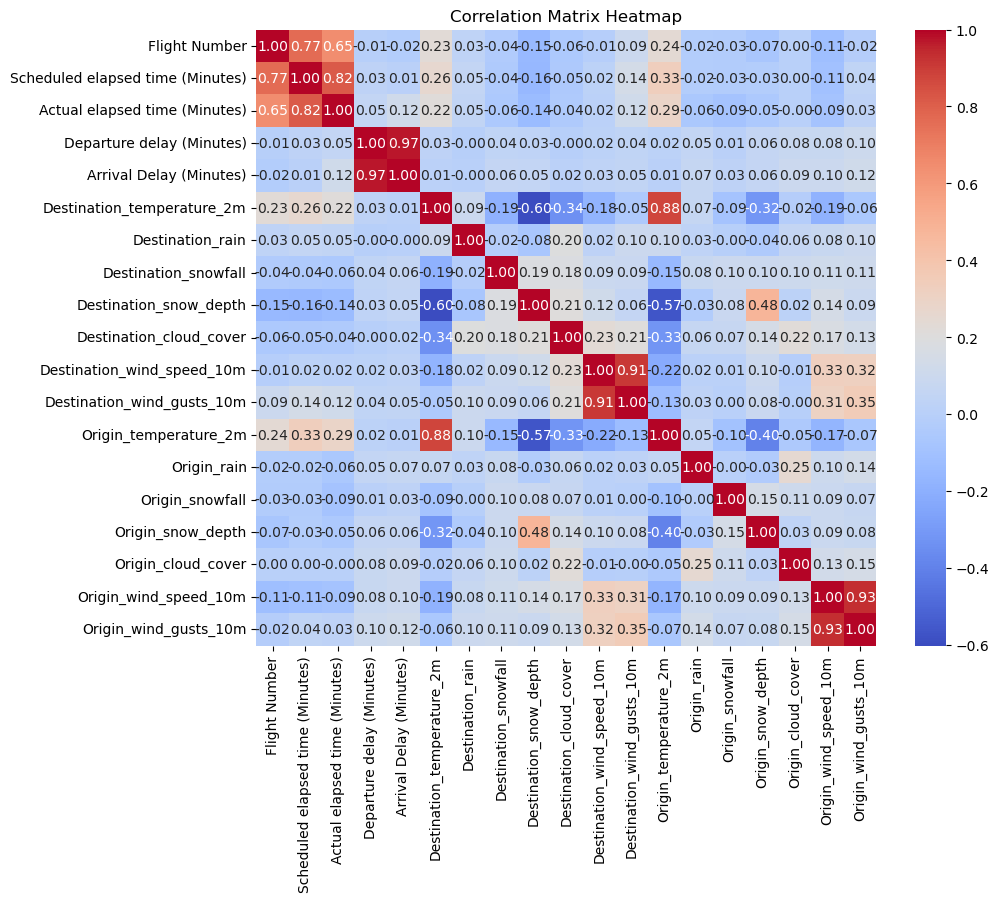

In [21]:
# Find the correlation between each features
numeric_cols = first_flight_data.select_dtypes(include=[np.number])  
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as necessary
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Elapsed Time vs. Arrival Delay')

Text(0.5, 0, 'Actual Elapsed Time (Minutes)')

Text(0, 0.5, 'Arrival Delay (Minutes)')

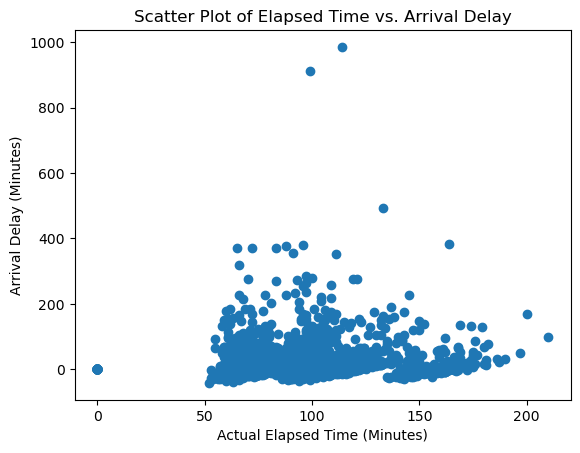

In [22]:
# Scatter plot to visualize the relationship between elapsed time and arrival delay
plt.scatter(first_flight_data['Actual elapsed time (Minutes)'], first_flight_data['Arrival Delay (Minutes)'])
plt.title('Scatter Plot of Elapsed Time vs. Arrival Delay')
plt.xlabel('Actual Elapsed Time (Minutes)')
plt.ylabel('Arrival Delay (Minutes)')
plt.show()

(array([ 55., 184., 362., 505., 455., 456., 391., 295., 247., 188., 148.,
        100.,  75.,  48.,  23.,  25.,   8.,   7.,   5.,   2.]),
 array([ 0.        ,  1.06469212,  2.12938423,  3.19407635,  4.25876846,
         5.32346058,  6.38815269,  7.45284481,  8.51753693,  9.58222904,
        10.64692116, 11.71161327, 12.77630539, 13.84099751, 14.90568962,
        15.97038174, 17.03507385, 18.09976597, 19.16445808, 20.2291502 ,
        21.29384232]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram of Arrival Delay by Destination Wind Speed')

Text(0.5, 0, 'Destination Wind Speed (10m)')

Text(0, 0.5, 'Frequency')

(array([3.419e+03, 8.500e+01, 3.700e+01, 1.900e+01, 4.000e+00, 4.000e+00,
        3.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.03976378, 0.07952756, 0.11929134, 0.15905513,
        0.19881891, 0.23858269, 0.27834647, 0.31811025, 0.35787403,
        0.39763781, 0.4374016 , 0.47716538, 0.51692916, 0.55669294,
        0.59645672, 0.6362205 , 0.67598428, 0.71574807, 0.75551185,
        0.79527563]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram of Arrival Delay by Destination Rain')

Text(0.5, 0, 'Destination Rain')

Text(0, 0.5, 'Frequency')

(array([3.446e+03, 6.500e+01, 1.800e+01, 1.400e+01, 6.000e+00, 1.000e+01,
        4.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.        , 0.04271653, 0.08543307, 0.1281496 , 0.17086613,
        0.21358266, 0.2562992 , 0.29901573, 0.34173226, 0.3844488 ,
        0.42716533, 0.46988186, 0.5125984 , 0.55531493, 0.59803146,
        0.64074799, 0.68346453, 0.72618106, 0.76889759, 0.81161413,
        0.85433066]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram of Arrival Delay by Destination Snowfall')

Text(0.5, 0, 'Destination Snowfall')

Text(0, 0.5, 'Frequency')

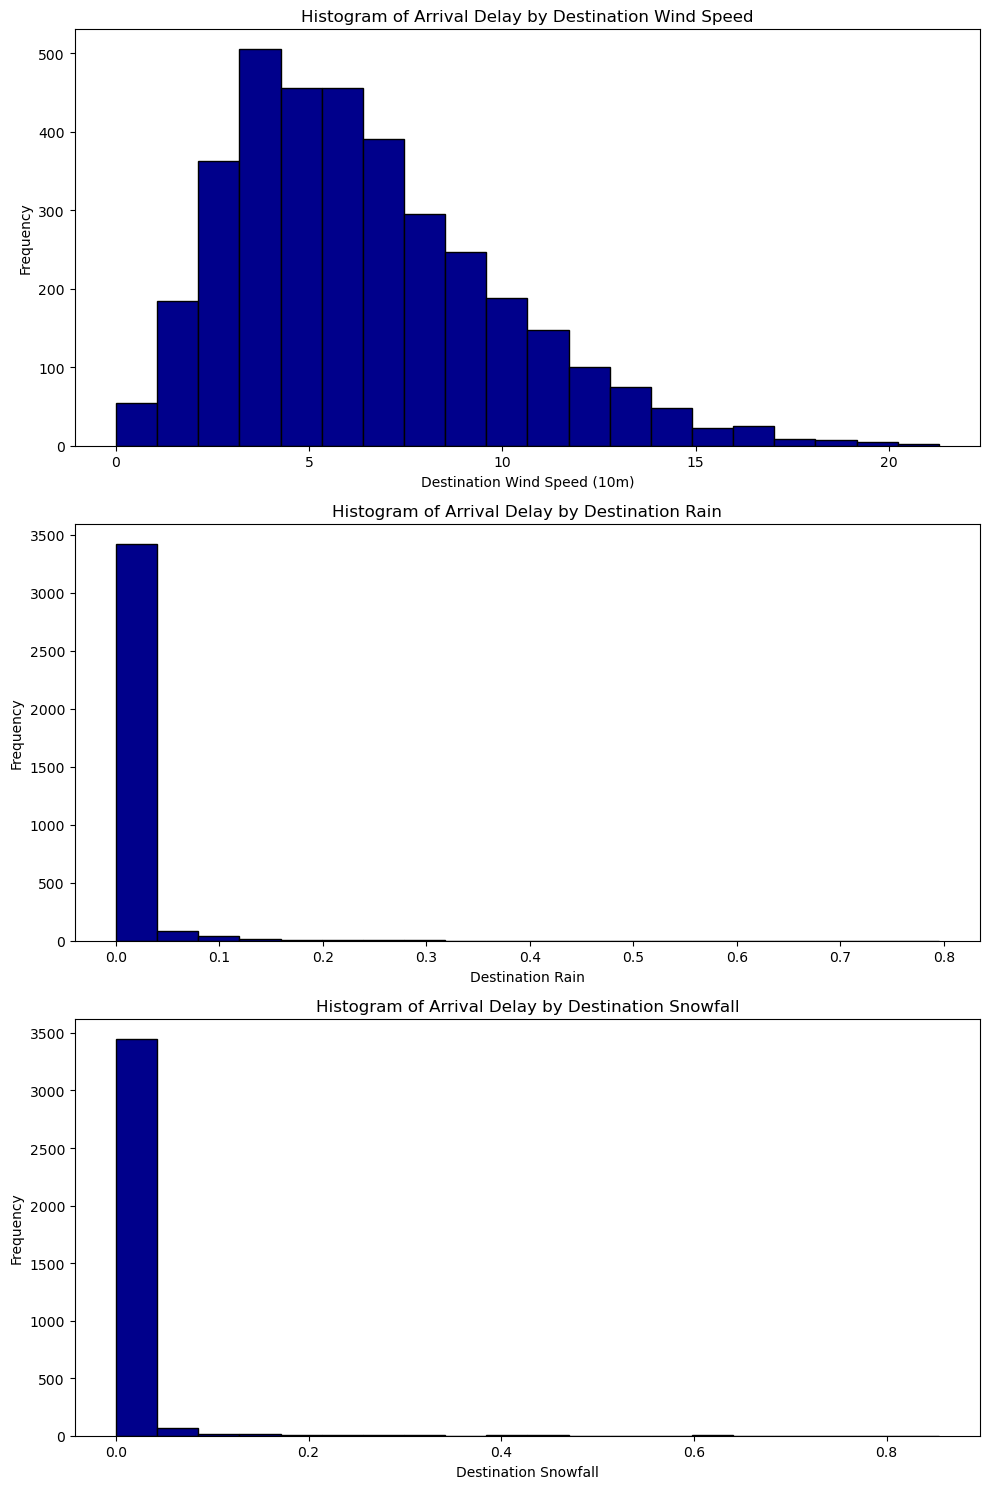

In [23]:
# Create subplots to display histograms
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histogram to visualize the distribution of arrival delay with destination wind speed
axs[0].hist(first_flight_data['Destination_wind_speed_10m'], bins=20, color='darkblue', edgecolor='black')
axs[0].set_title('Histogram of Arrival Delay by Destination Wind Speed')
axs[0].set_xlabel('Destination Wind Speed (10m)')
axs[0].set_ylabel('Frequency')

# Histogram to visualize the distribution of arrival delay with destination rain
axs[1].hist(first_flight_data['Destination_rain'], bins=20, color='darkblue', edgecolor='black')
axs[1].set_title('Histogram of Arrival Delay by Destination Rain')
axs[1].set_xlabel('Destination Rain')
axs[1].set_ylabel('Frequency')

# Histogram to visualize the distribution of arrival delay with destination snowfall
axs[2].hist(first_flight_data['Destination_snowfall'], bins=20, color='darkblue', edgecolor='black')
axs[2].set_title('Histogram of Arrival Delay by Destination Snowfall')
axs[2].set_xlabel('Destination Snowfall')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: >

(array([  1.,   2.,   4.,   1.,  14.,  33.,  53., 128., 256., 333., 356.,
        299., 316., 320., 413., 490., 294., 177.,  79.,  10.]),
 array([-18.77980042, -13.00630035,  -7.23280029,  -1.45930023,
          4.31419983,  10.08769989,  15.86119995,  21.63470001,
         27.40820007,  33.18170013,  38.9552002 ,  44.72870026,
         50.50220032,  56.27570038,  62.04920044,  67.8227005 ,
         73.59620056,  79.36970062,  85.14320068,  90.91670074,
         96.69020081]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Temperature at Origin')

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([  3.,  11.,  15.,  23.,  42.,  72., 134., 192., 340., 343., 279.,
        258., 226., 270., 281., 381., 353., 222., 100.,  34.]),
 array([-12.24399948,  -7.09599972,  -1.94799995,   3.19999981,
          8.34799957,  13.49599934,  18.6439991 ,  23.79199886,
         28.93999863,  34.08799839,  39.23599815,  44.38399792,
         49.53199768,  54.67999744,  59.82799721,  64.97599697,
         70.12399673,  75.2719965 ,  80.41999626,  85.56799603,
         90.71599579]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Temperature at Destination')

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Frequency')

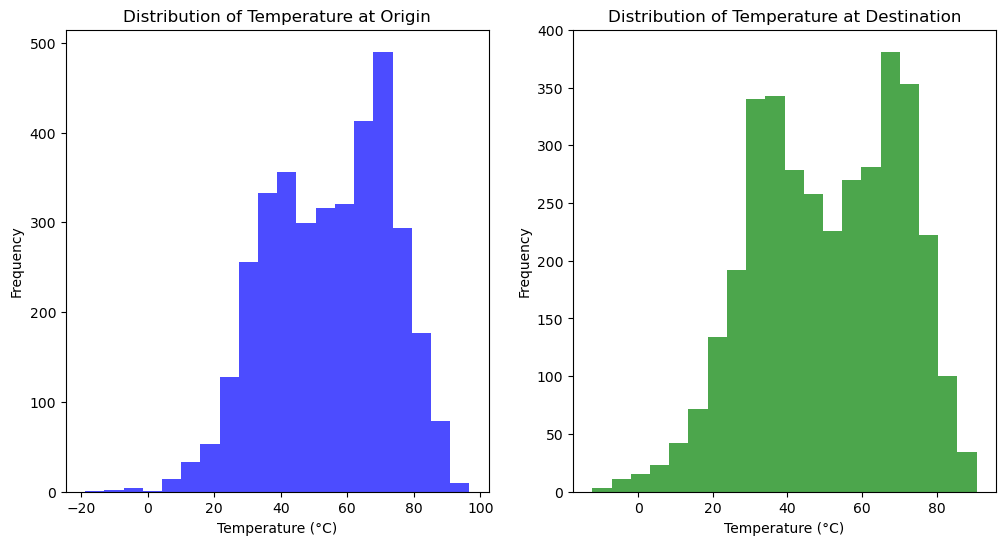

<Figure size 1200x600 with 0 Axes>

<Axes: >

(array([3.387e+03, 8.100e+01, 4.500e+01, 2.100e+01, 1.900e+01, 4.000e+00,
        6.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.02362205, 0.0472441 , 0.07086614, 0.09448819,
        0.11811024, 0.14173229, 0.16535434, 0.18897638, 0.21259843,
        0.23622048, 0.25984253, 0.28346457, 0.30708662, 0.33070867,
        0.35433072, 0.37795277, 0.40157481, 0.42519686, 0.44881891,
        0.47244096]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Rain at Origin')

Text(0.5, 0, 'Rain (mm)')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([3.419e+03, 8.500e+01, 3.700e+01, 1.900e+01, 4.000e+00, 4.000e+00,
        3.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.03976378, 0.07952756, 0.11929134, 0.15905513,
        0.19881891, 0.23858269, 0.27834647, 0.31811025, 0.35787403,
        0.39763781, 0.4374016 , 0.47716538, 0.51692916, 0.55669294,
        0.59645672, 0.6362205 , 0.67598428, 0.71574807, 0.75551185,
        0.79527563]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Rain at Destination')

Text(0.5, 0, 'Rain (mm)')

Text(0, 0.5, 'Frequency')

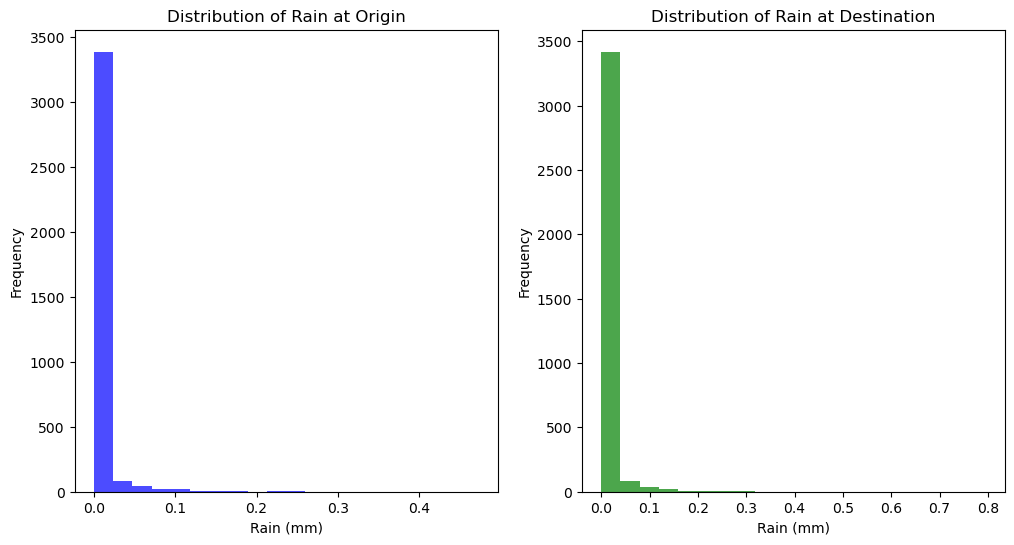

<Figure size 1200x600 with 0 Axes>

<Axes: >

(array([3.544e+03, 1.800e+01, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.06889764, 0.13779528, 0.20669292, 0.27559056,
        0.3444882 , 0.41338584, 0.48228348, 0.55118113, 0.62007877,
        0.68897641, 0.75787405, 0.82677169, 0.89566933, 0.96456697,
        1.03346461, 1.10236225, 1.17125989, 1.24015753, 1.30905517,
        1.37795281]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Snowfall at Origin')

Text(0.5, 0, 'Snowfall (mm)')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([3.446e+03, 6.500e+01, 1.800e+01, 1.400e+01, 6.000e+00, 1.000e+01,
        4.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.        , 0.04271653, 0.08543307, 0.1281496 , 0.17086613,
        0.21358266, 0.2562992 , 0.29901573, 0.34173226, 0.3844488 ,
        0.42716533, 0.46988186, 0.5125984 , 0.55531493, 0.59803146,
        0.64074799, 0.68346453, 0.72618106, 0.76889759, 0.81161413,
        0.85433066]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Snowfall at Destination')

Text(0.5, 0, 'Snowfall (mm)')

Text(0, 0.5, 'Frequency')

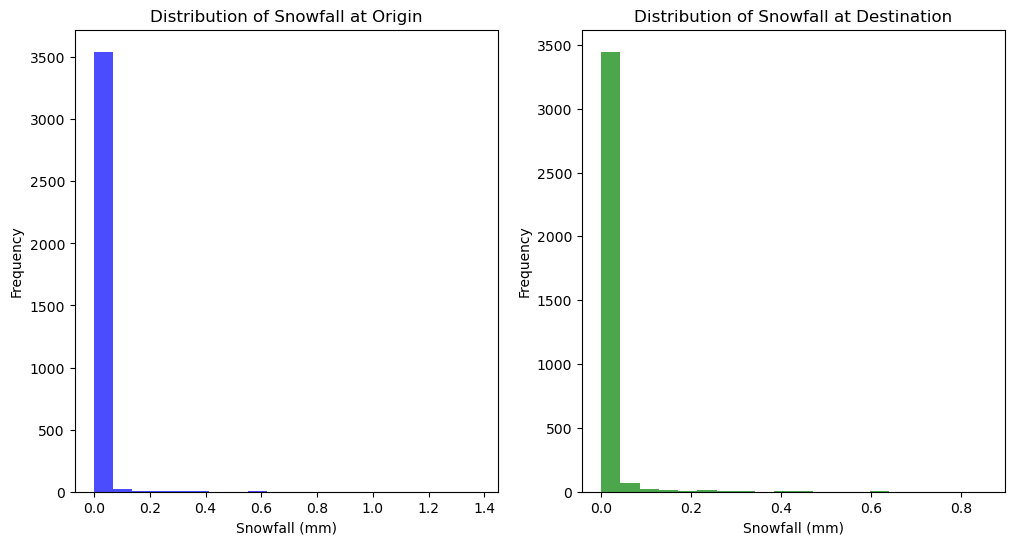

<Figure size 1200x600 with 0 Axes>

<Axes: >

(array([ 57., 189., 352., 533., 490., 481., 396., 332., 245., 188., 124.,
         72.,  52.,  26.,  16.,  11.,   4.,   5.,   3.,   3.]),
 array([ 0.        ,  1.47641993,  2.95283985,  4.42925978,  5.9056797 ,
         7.38209963,  8.85851955, 10.33493948, 11.81135941, 13.28777933,
        14.76419926, 16.24061918, 17.71703911, 19.19345903, 20.66987896,
        22.14629889, 23.62271881, 25.09913874, 26.57555866, 28.05197859,
        29.52839851]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Wind Speed at Origin')

Text(0.5, 0, 'Wind Speed (m/s)')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([ 55., 184., 362., 505., 455., 456., 391., 295., 247., 188., 148.,
        100.,  75.,  48.,  23.,  25.,   8.,   7.,   5.,   2.]),
 array([ 0.        ,  1.06469212,  2.12938423,  3.19407635,  4.25876846,
         5.32346058,  6.38815269,  7.45284481,  8.51753693,  9.58222904,
        10.64692116, 11.71161327, 12.77630539, 13.84099751, 14.90568962,
        15.97038174, 17.03507385, 18.09976597, 19.16445808, 20.2291502 ,
        21.29384232]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Wind Speed at Destination')

Text(0.5, 0, 'Wind Speed (m/s)')

Text(0, 0.5, 'Frequency')

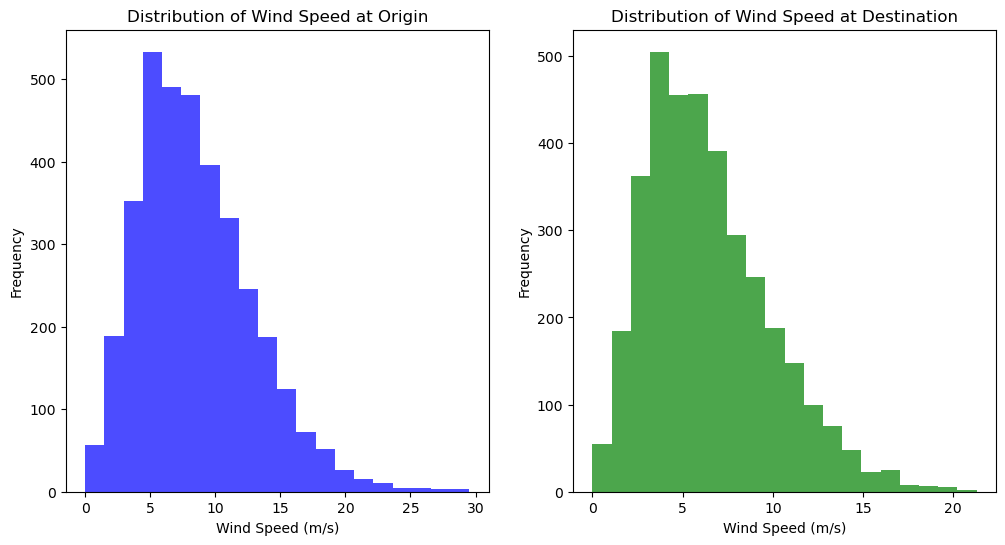

In [24]:
# Histograms for Temperature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(first_flight_data['Origin_temperature_2m'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Temperature at Origin')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(first_flight_data['Destination_temperature_2m'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Temperature at Destination')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Histograms for Rain
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(first_flight_data['Origin_rain'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Rain at Origin')
plt.xlabel('Rain (mm)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(first_flight_data['Destination_rain'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Rain at Destination')
plt.xlabel('Rain (mm)')
plt.ylabel('Frequency')
plt.show()

# Histograms for Snowfall
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(first_flight_data['Origin_snowfall'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Snowfall at Origin')
plt.xlabel('Snowfall (mm)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(first_flight_data['Destination_snowfall'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Snowfall at Destination')
plt.xlabel('Snowfall (mm)')
plt.ylabel('Frequency')
plt.show()

# Histograms for Wind Speed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(first_flight_data['Origin_wind_speed_10m'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Wind Speed at Origin')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(first_flight_data['Destination_wind_speed_10m'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Wind Speed at Destination')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

<Axes: >

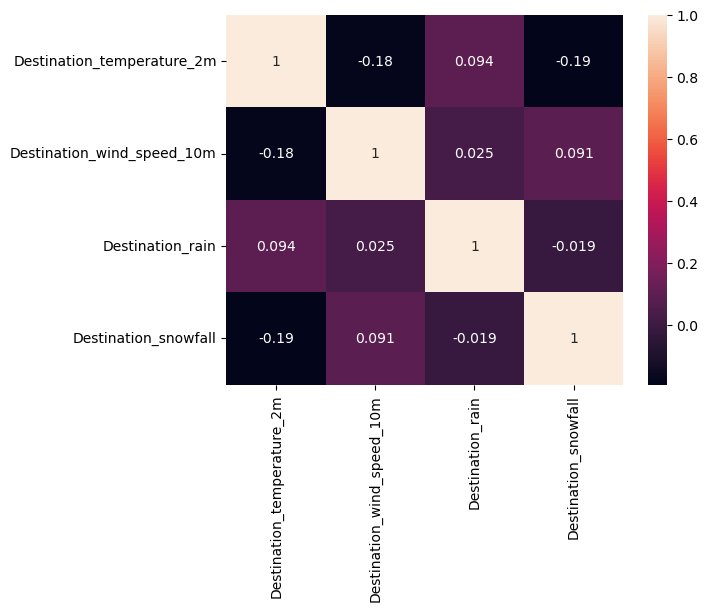

<Axes: >

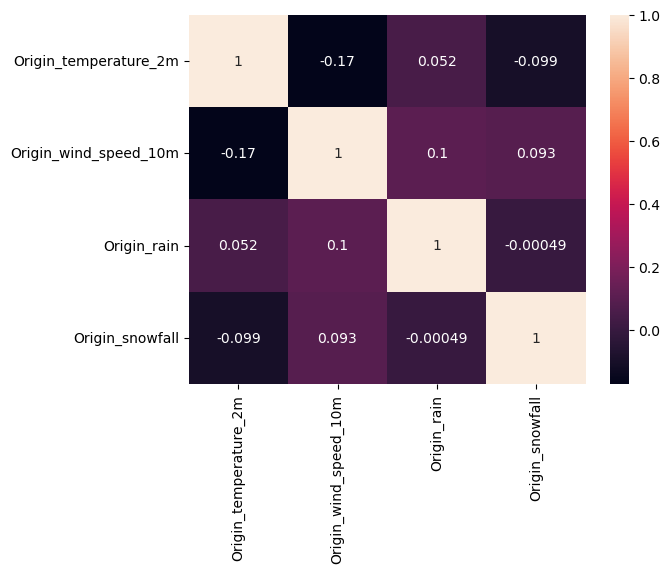

In [25]:
# Correlation matrix heatmap
corr_matrix = first_flight_data[['Destination_temperature_2m', 'Destination_wind_speed_10m', 'Destination_rain', 'Destination_snowfall']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Correlation matrix heatmap
corr_matrix = first_flight_data[['Origin_temperature_2m', 'Origin_wind_speed_10m', 'Origin_rain', 'Origin_snowfall']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Data pre-processing**

In this stage, we prepare the dataset for machine learning algorithms by transforming and engineering features. This includes converting date and time columns into datetime objects, extracting relevant information such as hour and minute, and defining new features based on domain knowledge, such as flight status. Pre-processing ensures that the data is in a suitable format for training machine learning models.

In [26]:
# Combining date and time columns into datetime objects
date_columns = ['Date (MM/DD/YYYY)']
time_columns = ['Scheduled departure time', 'Scheduled Arrival Time']

for col in time_columns:
    first_flight_data[col] = pd.to_datetime(first_flight_data[date_columns[0]].astype(str) + ' ' + first_flight_data[col].astype(str), errors='coerce')

# Extracting hour and minute from datetime columns
for col in time_columns:
    first_flight_data[col + '_Hour'] = first_flight_data[col].dt.hour
    first_flight_data[col + '_Minute'] = first_flight_data[col].dt.minute

In [27]:
# Method to calculate the flight status based on arrival delay
def calculate_flight_status(arrival_delay_minutes):
    if arrival_delay_minutes < -5:
        return "Early"
    elif -5 <= arrival_delay_minutes <= 5:
        return "On-time"
    else:
        return "Late"

first_flight_data['Flight_Status'] = first_flight_data['Arrival Delay (Minutes)'].apply(calculate_flight_status)

**Feature Selection**

Feature selection involves identifying and removing irrelevant or redundant features from the dataset. In this section, we drop columns that are not useful for our analysis or modeling, such as identifiers or variables with high cardinality. By selecting only the most relevant features, we improve model efficiency, reduce overfitting, and enhance interpretability.

In [28]:
# List of columns to drop
unwanted_columns = ['Carrier Code', 'Tail Number', 'Destination Airport', 
                    'Actual Arrival Time', 'Actual elapsed time (Minutes)', 'Actual departure time', 'Scheduled departure time', 'Scheduled Arrival Time', 'Arrival Delay (Minutes)', 'Departure delay (Minutes)']

# Drop columns
first_flight_data.drop(columns=unwanted_columns, axis=1, inplace=True)

In [29]:
first_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date (MM/DD/YYYY)                 3579 non-null   datetime64[ns]
 1   Flight Number                     3579 non-null   int64         
 2   Origin Airport                    3579 non-null   object        
 3   Scheduled elapsed time (Minutes)  3579 non-null   int64         
 4   Destination_temperature_2m        3579 non-null   float64       
 5   Destination_rain                  3579 non-null   float64       
 6   Destination_snowfall              3579 non-null   float64       
 7   Destination_snow_depth            3579 non-null   float64       
 8   Destination_cloud_cover           3579 non-null   float64       
 9   Destination_wind_speed_10m        3579 non-null   float64       
 10  Destination_wind_gusts_10m        3579 non-null 

**One hot encoding**

Categorical variables need to be converted into a numerical format for machine learning models to process them effectively. One-hot encoding is a technique used to transform categorical variables into binary vectors, where each category becomes a binary feature. Here, we apply one-hot encoding to categorical variables like 'Origin Airport', creating dummy variables that represent the presence or absence of each category. This ensures that categorical variables are appropriately represented in our dataset for modeling purposes.

In [30]:
from sklearn.preprocessing import OneHotEncoder

def get_ohe(df, col):
    ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False, dtype='int')
    ohe.fit(df[[col]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[col]]), columns=ohe.get_feature_names_out())
    df.drop(columns=[col], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [31]:
# Create dummy variables for Origin Airport using one hot encoding
first_flight_data = get_ohe(first_flight_data, 'Origin Airport')
first_flight_data.head()

,Date (MM/DD/YYYY),Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,...,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Flight_Status,Origin Airport_MCO,Origin Airport_ORD
0,2019-09-08,116,73,56.88,0.00,0.00,0.00,43.80,6.09,12.97,...,1.80,5.20,10.07,7,24,8,37,Early,0,0
1,2019-09-15,116,73,56.61,0.00,0.00,0.00,0.00,6.01,9.40,...,100.00,3.61,7.38,7,24,8,37,Early,0,0
2,2019-09-22,116,73,63.09,0.00,0.00,0.00,0.00,3.91,5.82,...,0.00,4.95,8.28,7,24,8,37,Early,0,0
3,2019-09-29,116,73,56.43,0.00,0.00,0.00,88.20,5.80,13.65,...,0.00,6.76,10.74,7,24,8,37,Early,0,0
4,2017-01-01,116,77,30.60,0.00,0.00,0.39,50.10,11.40,29.75,...,1.20,13.11,22.59,9,0,10,17,On-time,0,0


In [32]:
first_flight_data.dtypes

Date (MM/DD/YYYY)                   datetime64[ns]
Flight Number                                int64
Scheduled elapsed time (Minutes)             int64
Destination_temperature_2m                 float64
Destination_rain                           float64
Destination_snowfall                       float64
Destination_snow_depth                     float64
Destination_cloud_cover                    float64
Destination_wind_speed_10m                 float64
Destination_wind_gusts_10m                 float64
Origin_temperature_2m                      float64
Origin_rain                                float64
Origin_snowfall                            float64
Origin_snow_depth                          float64
Origin_cloud_cover                         float64
Origin_wind_speed_10m                      float64
Origin_wind_gusts_10m                      float64
Scheduled departure time_Hour                int32
Scheduled departure time_Minute              int32
Scheduled Arrival Time_Hour    

**Model Training**

In [33]:
from sklearn.model_selection import train_test_split

X = first_flight_data.drop(columns=['Date (MM/DD/YYYY)', 'Flight_Status'])
y = first_flight_data['Flight_Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35, stratify = first_flight_data['Flight_Status'])

X_train
X_test
y_train
y_test

,Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,...,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD
1517,116,69,65.34,0.00,0.00,0.00,0.90,1.14,7.83,60.62,...,0.00,85.20,13.91,25.28,13,30,14,39,0,0
2366,1422,112,78.03,0.00,0.00,0.00,14.40,6.71,17.22,82.92,...,0.00,23.40,1.12,9.17,18,15,21,7,0,1
3072,538,114,70.02,0.00,0.00,0.00,78.90,6.14,14.54,64.29,...,0.00,96.30,12.75,24.16,18,16,21,10,0,1
2206,607,116,62.37,0.00,0.00,0.00,28.80,3.96,10.51,68.07,...,0.00,0.00,5.41,13.42,18,0,20,56,0,1
156,116,86,49.95,0.00,0.00,0.00,0.00,6.41,9.62,54.05,...,0.00,0.00,4.61,7.61,8,35,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,116,74,58.77,0.02,0.00,0.00,100.00,6.70,15.21,70.07,...,0.00,73.20,8.01,18.34,6,56,8,10,0,0
534,116,71,54.45,0.00,0.00,0.00,40.20,5.75,11.41,60.98,...,0.00,0.00,7.52,12.08,7,4,8,15,0,0
2428,2000,111,46.35,0.00,0.00,0.00,1.20,6.44,18.34,44.67,...,0.00,49.20,12.81,25.50,18,0,20,51,0,1
2391,1815,117,64.98,0.00,0.00,0.00,54.60,3.41,10.96,74.01,...,0.00,22.50,13.46,27.52,18,5,21,2,0,1


,Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,...,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD
1642,849,111,76.32,0.00,0.00,0.00,64.80,4.72,16.33,82.92,...,0.00,15.30,17.19,34.67,17,50,20,41,0,1
1723,1500,112,73.53,0.00,0.00,0.00,75.30,6.14,16.55,67.17,...,0.00,48.60,4.24,10.29,13,58,16,50,0,1
2302,1224,116,43.92,0.00,0.00,0.00,100.00,6.51,20.80,41.25,...,0.00,100.00,12.84,27.07,18,40,21,36,0,1
2967,1998,109,37.98,0.00,0.00,0.56,100.00,8.97,20.36,53.13,...,0.00,54.90,9.70,20.13,18,19,21,8,0,1
3444,3718,160,77.85,0.00,0.00,0.00,8.70,4.41,13.65,72.04,...,0.00,32.40,3.30,10.07,12,50,15,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,116,75,34.38,0.00,0.00,0.00,1.50,5.44,8.28,37.31,...,0.00,0.00,6.36,8.50,8,20,9,35,0,0
1583,116,81,32.04,0.00,0.00,0.07,97.20,6.61,15.44,35.06,...,0.00,32.70,6.11,12.30,14,0,15,21,0,0
2517,1094,109,42.93,0.01,0.00,0.00,79.50,7.29,16.33,32.34,...,0.00,93.30,14.10,28.19,18,9,20,58,0,1
891,116,79,58.14,0.00,0.00,0.00,0.00,1.50,7.61,66.02,...,0.00,56.40,7.61,12.97,10,35,11,54,0,0


1517       Late
2366      Early
3072       Late
2206      Early
156       Early
         ...   
905       Early
534     On-time
2428      Early
2391      Early
1823      Early
Name: Flight_Status, Length: 2863, dtype: object

1642     Late
1723    Early
2302    Early
2967    Early
3444    Early
        ...  
1111    Early
1583    Early
2517    Early
891     Early
1026    Early
Name: Flight_Status, Length: 716, dtype: object

In [34]:
# Scale train and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test

,Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,...,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD
1517,-0.77,-1.14,0.75,-0.22,-0.17,-0.47,-1.43,-1.54,-0.96,0.33,...,-0.25,1.04,1.23,1.03,0.01,0.41,-0.14,0.44,-0.24,-0.96
2366,0.71,0.61,1.40,-0.22,-0.17,-0.47,-1.07,0.10,0.23,1.55,...,-0.25,-0.57,-1.69,-1.02,1.09,-0.38,1.19,-1.26,-0.24,1.05
3072,-0.29,0.69,0.99,-0.22,-0.17,-0.47,0.64,-0.06,-0.11,0.53,...,-0.25,1.33,0.96,0.89,1.09,-0.33,1.19,-1.10,-0.24,1.05
2206,-0.21,0.78,0.60,-0.22,-0.17,-0.47,-0.69,-0.71,-0.62,0.74,...,-0.25,-1.17,-0.71,-0.48,1.09,-1.17,1.00,1.34,-0.24,1.05
156,-0.77,-0.45,-0.04,-0.22,-0.17,-0.47,-1.45,0.01,-0.73,-0.03,...,-0.25,-1.17,-0.90,-1.22,-1.06,0.68,-0.90,-1.58,-0.24,-0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.77,-0.93,0.41,0.56,-0.17,-0.47,1.19,0.10,-0.02,0.84,...,-0.25,0.73,-0.12,0.15,-1.49,1.78,-1.28,-1.10,-0.24,-0.96
534,-0.77,-1.06,0.19,-0.22,-0.17,-0.47,-0.39,-0.18,-0.50,0.35,...,-0.25,-1.17,-0.23,-0.65,-1.28,-0.96,-1.28,-0.84,-0.24,-0.96
2428,1.36,0.57,-0.22,-0.22,-0.17,-0.47,-1.42,0.02,0.37,-0.54,...,-0.25,0.10,0.98,1.06,1.09,-1.17,1.00,1.08,-0.24,1.05
2391,1.15,0.82,0.73,-0.22,-0.17,-0.47,-0.01,-0.87,-0.56,1.06,...,-0.25,-0.59,1.12,1.31,1.09,-0.90,1.19,-1.53,-0.24,1.05


,Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,...,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD
1642,0.06,0.57,1.31,-0.22,-0.17,-0.47,0.26,-0.48,0.12,1.55,...,-0.25,-0.78,1.98,2.23,0.87,1.47,1.00,0.55,-0.24,1.05
1723,0.79,0.61,1.17,-0.22,-0.17,-0.47,0.54,-0.06,0.15,0.69,...,-0.25,0.09,-0.98,-0.87,0.01,1.89,0.24,1.02,-0.24,1.05
2302,0.48,0.78,-0.35,-0.22,-0.17,-0.47,1.19,0.05,0.68,-0.73,...,-0.25,1.42,0.98,1.26,1.09,0.94,1.19,0.28,-0.24,1.05
2967,1.36,0.49,-0.65,-0.22,-0.17,2.06,1.19,0.77,0.63,-0.08,...,-0.25,0.25,0.27,0.38,1.09,-0.17,1.19,-1.21,-0.24,1.05
3444,3.30,2.57,1.39,-0.22,-0.17,-0.47,-1.22,-0.57,-0.22,0.95,...,-0.25,-0.33,-1.19,-0.90,-0.20,1.47,0.05,-0.04,4.10,-0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,-0.77,-0.89,-0.84,-0.22,-0.17,-0.47,-1.41,-0.27,-0.90,-0.95,...,-0.25,-1.17,-0.50,-1.10,-1.06,-0.11,-1.09,0.23,-0.24,-0.96
1583,-0.77,-0.65,-0.96,-0.22,-0.17,-0.17,1.12,0.07,0.01,-1.07,...,-0.25,-0.32,-0.55,-0.62,0.23,-1.17,0.05,-0.52,-0.24,-0.96
2517,0.34,0.49,-0.40,0.04,-0.17,-0.47,0.65,0.27,0.12,-1.22,...,-0.25,1.25,1.27,1.40,1.09,-0.69,1.00,1.45,-0.24,1.05
891,-0.77,-0.73,0.38,-0.22,-0.17,-0.47,-1.45,-1.43,-0.99,0.62,...,-0.25,0.29,-0.21,-0.53,-0.63,0.68,-0.71,1.24,-0.24,-0.96


**Random Forest Classifier**

In this section, we train a Random Forest Classifier model to predict flight statuses. First, we split the dataset into training and testing sets using the train_test_split function from scikit-learn. Then, we initialize a Random Forest Classifier and set up a grid of hyperparameters to search over using GridSearchCV. Hyperparameters like the number of estimators, maximum depth, and minimum samples per leaf are varied to find the best combination. After fitting the model to the training data, we make predictions on the testing set and evaluate the model's performance using classification metrics like precision, recall, and F1-score. Hyperparameter tuning is essential to find the optimal configuration that maximizes model performance and generalization to unseen data.

In [35]:
# Hyperparameters setup
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [2, 5, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [3, 6],
    'bootstrap': [True, False]
}

# Initialize and fit the GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best estimator
best_rf = grid_search_rf.best_estimator_

# Predictions
predictions_rf = best_rf.predict(X_test)

# Evaluation
print("Random Forest Classifier:")
print("Best Parameters:", grid_search_rf.best_params_)
print(classification_report(y_test, predictions_rf))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 5, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

Random Forest Classifier:
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

       Early       0.55      0.89      0.68       360
        Late       0.47      0.27      0.35       209
     On-time       0.20      0.01      0.03       147

    accuracy                           0.53       716
   macro avg       0.41      0.39      0.35       716
weighted avg       0.46      0.53      0.45       716



In [36]:
best_rf.score(X_train, y_train)
best_rf.score(X_test, y_test)

0.7698218651763884

0.5321229050279329

**Gradient Boosting Classifier**

Similar to the Random Forest Classifier, we also train a Gradient Boosting Classifier in this section. The process involves splitting the data, setting up a parameter grid for hyperparameter tuning, and fitting the model using GridSearchCV. Hyperparameters such as learning rate, maximum depth, and minimum samples per leaf are optimized to improve the model's accuracy and robustness. After training the model, we make predictions on the test set and evaluate its performance using classification metrics. Hyperparameter tuning helps fine-tune the model's parameters, leading to better predictive performance and avoiding overfitting.

In [37]:
# Hyperparameters setup
param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 5, 8],
    'min_samples_leaf': [3, 6],
    'min_samples_split': [2, 3, 6]
}

# Initialize and fit the GridSearchCV
gbm = GradientBoostingClassifier(random_state=42)
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_gbm.fit(X_train, y_train)

# Best estimator
best_gbm = grid_search_gbm.best_estimator_

# Predictions
predictions_gbm = best_gbm.predict(X_test)

# Evaluation
print("Gradient Boosting Classifier:")
print("Best Parameters:", grid_search_gbm.best_params_)
print(classification_report(y_test, predictions_gbm))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 5, 8], 'min_samples_leaf': [3, 6],
                         'min_samples_split': [2, 3, 6],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

Gradient Boosting Classifier:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

       Early       0.55      0.91      0.68       360
        Late       0.50      0.25      0.33       209
     On-time       0.26      0.03      0.06       147

    accuracy                           0.53       716
   macro avg       0.44      0.40      0.36       716
weighted avg       0.48      0.53      0.45       716



In [38]:
best_gbm.score(X_train, y_train)
best_gbm.score(X_test, y_test)

0.5997205728257073

0.5349162011173184

**XGBoost Classifier**

In this part, we utilize the XGBoost algorithm for classification. Similarly, we split the data, set up a parameter grid for hyperparameter tuning, and use GridSearchCV to find the best combination of hyperparameters. XGBoost is known for its efficiency and performance in handling large datasets, making it a popular choice for classification tasks. After training the model and making predictions on the test set, we evaluate its performance using classification metrics. Hyperparameter tuning is crucial in XGBoost to optimize model performance, improve accuracy, and prevent overfitting, ultimately leading to better predictions on unseen data.

In [39]:
# Hyperparameters setup
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize and fit the GridSearchCV
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, scoring='accuracy')
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
grid_search_xgb.fit(X_train, y_train_encoded)

# Best estimator
best_xgb = grid_search_xgb.best_estimator_

# Predictions
predictions_xgb = best_xgb.predict(X_test)

# Evaluation
print("XGBoost Classifier:")
print("Best Parameters:", grid_search_xgb.best_params_)
print(classification_report(y_test_encoded, predictions_xgb))

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

XGBoost Classifier:
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
              precision    recall  f1-score   support

           0       0.56      0.94      0.70       360
           1       0.56      0.27      0.36       209
           2       0.20      0.01      0.03       147

    accuracy                           0.55       716
   macro avg       0.44      0.41      0.36       716
weighted avg       0.48      0.55      0.46       716



In [40]:
best_xgb.score(X_train, y_train_encoded)
best_xgb.score(X_test, y_test_encoded)

0.6381418092909535

0.5516759776536313

Here's a summary of the evaluation metrics for each model:

**Random Forest Classifier:**

Accuracy: 0.532

Precision (weighted avg): 0.46

Recall (weighted avg): 0.53

F1-score (weighted avg): 0.45


**Gradient Boosting Classifier:**

Accuracy: 0.535

Precision (weighted avg): 0.48

Recall (weighted avg): 0.53

F1-score (weighted avg): 0.45

**XGBoost Classifier:**

Accuracy: 0.552

Precision (weighted avg): 0.48

Recall (weighted avg): 0.55

F1-score (weighted avg): 0.46

Based on the higher accuracy and F1-score, the **XGBoost Classifier** outperforms the other two models. 

**Feature Importances**

This section of the code visualizes the feature importances obtained from the trained XGBoost model. First, the feature importances are extracted using best_xgb.feature_importances_. Then, a DataFrame is created to display the feature importances, sorting them in descending order. Finally, the top 25 features are visualized using a bar plot, showing the importance of each feature in predicting flight status.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

Text(0.5, 1.0, 'Top 10 Feature Importances')

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

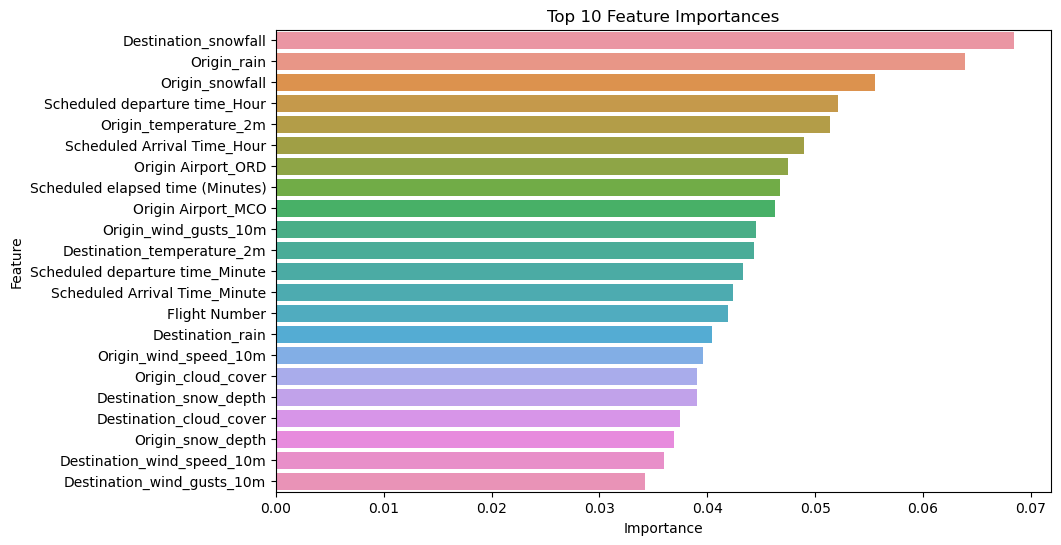

In [41]:
feature_importances = best_xgb.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:25])  # Display top 10 features
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Predicting Flight Status and Merging with Actual Values**

In this part of the code, the XGBoost model is used to predict the flight status variable (Pred_Flight_Status_Test) for the test data. These predictions are merged with the actual flight status (Flight_Status) to create a DataFrame (first_flight_test_output). The predicted flight status labels are then encoded back to their original categorical values using label_encoder.inverse_transform(). 

The predicted flight status for the training data is merged with the original training data (first_flight_train_output). This allows for a comparison between the predicted and actual flight status labels for the training data. The resulting DataFrame contains both the predicted and actual flight status labels, along with other relevant features. This dataset is used in the future for adding the predicted flight status for the first flight as a features to the second flight arrival prediction model.

In [42]:
#Create a dataframe to predict the Flight_Status variable and merge it with the actual ''Flight_Status' variable
first_flight_test_output = pd.DataFrame(best_xgb.predict(X_test), index = X_test.index, columns = ['Pred_Flight_Status_Test'])
first_flight_test_output = first_flight_test_output.merge(y_test, left_index = True, right_index = True)

In [43]:
first_flight_test_output['Pred_Flight_Status_Test'] = label_encoder.inverse_transform(first_flight_test_output['Pred_Flight_Status_Test'])
first_flight_test_output.head()

,Pred_Flight_Status_Test,Flight_Status
1642,Late,Late
1723,Early,Early
2302,Early,Early
2967,Early,Early
3444,Early,Early


In [45]:
first_flight_train_output = pd.DataFrame(best_xgb.predict(X_train), index = X_train.index, columns = ['Pred_Flight_Status_Train'])
first_flight_train_output = first_flight_train_output.merge(y_train, left_index = True, right_index = True)

In [46]:
first_flight_train_output['Pred_Flight_Status_Train'] = label_encoder.inverse_transform(first_flight_train_output['Pred_Flight_Status_Train'])
first_flight_train_output.head()

,Pred_Flight_Status_Train,Flight_Status
1517,Late,Late
2366,Early,Early
3072,Late,Late
2206,Early,Early
156,Early,Early


In [47]:
first_flight_train_output = first_flight_train_output.merge(first_flight_data, left_index = True, right_index = True)
first_flight_train_output.drop(columns = ['Flight_Status_x', 'Flight_Status_y'], inplace = True)

In [48]:
first_flight_train_output

,Pred_Flight_Status_Train,Date (MM/DD/YYYY),Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,...,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD
1517,Late,2023-09-30,116,69,65.34,0.00,0.00,0.00,0.90,1.14,...,0.00,85.20,13.91,25.28,13,30,14,39,0,0
2366,Early,2021-08-30,1422,112,78.03,0.00,0.00,0.00,14.40,6.71,...,0.00,23.40,1.12,9.17,18,15,21,7,0,1
3072,Late,2023-06-13,538,114,70.02,0.00,0.00,0.00,78.90,6.14,...,0.00,96.30,12.75,24.16,18,16,21,10,0,1
2206,Early,2019-10-08,607,116,62.37,0.00,0.00,0.00,28.80,3.96,...,0.00,0.00,5.41,13.42,18,0,20,56,0,1
156,Early,2017-06-02,116,86,49.95,0.00,0.00,0.00,0.00,6.41,...,0.00,0.00,4.61,7.61,8,35,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,Early,2019-06-21,116,74,58.77,0.02,0.00,0.00,100.00,6.70,...,0.00,73.20,8.01,18.34,6,56,8,10,0,0
534,Early,2018-06-15,116,71,54.45,0.00,0.00,0.00,40.20,5.75,...,0.00,0.00,7.52,12.08,7,4,8,15,0,0
2428,Early,2021-11-02,2000,111,46.35,0.00,0.00,0.00,1.20,6.44,...,0.00,49.20,12.81,25.50,18,0,20,51,0,1
2391,Early,2021-09-24,1815,117,64.98,0.00,0.00,0.00,54.60,3.41,...,0.00,22.50,13.46,27.52,18,5,21,2,0,1


In [49]:
first_flight_test_output = first_flight_test_output.merge(first_flight_data, left_index = True, right_index = True)
first_flight_test_output.drop(columns = ['Flight_Status_x', 'Flight_Status_y'], inplace = True)

In [50]:
first_flight_test_output

,Pred_Flight_Status_Test,Date (MM/DD/YYYY),Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,...,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD
1642,Late,2017-06-10,849,111,76.32,0.00,0.00,0.00,64.80,4.72,...,0.00,15.30,17.19,34.67,17,50,20,41,0,1
1723,Early,2017-08-28,1500,112,73.53,0.00,0.00,0.00,75.30,6.14,...,0.00,48.60,4.24,10.29,13,58,16,50,0,1
2302,Early,2021-03-31,1224,116,43.92,0.00,0.00,0.00,100.00,6.51,...,0.00,100.00,12.84,27.07,18,40,21,36,0,1
2967,Early,2023-03-01,1998,109,37.98,0.00,0.00,0.56,100.00,8.97,...,0.00,54.90,9.70,20.13,18,19,21,8,0,1
3444,Early,2023-04-15,3718,160,77.85,0.00,0.00,0.00,8.70,4.41,...,0.00,32.40,3.30,10.07,12,50,15,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,Early,2021-11-06,116,75,34.38,0.00,0.00,0.00,1.50,5.44,...,0.00,0.00,6.36,8.50,8,20,9,35,0,0
1583,Early,2023-12-06,116,81,32.04,0.00,0.00,0.07,97.20,6.61,...,0.00,32.70,6.11,12.30,14,0,15,21,0,0
2517,Early,2022-03-26,1094,109,42.93,0.01,0.00,0.00,79.50,7.29,...,0.00,93.30,14.10,28.19,18,9,20,58,0,1
891,Early,2019-06-07,116,79,58.14,0.00,0.00,0.00,0.00,1.50,...,0.00,56.40,7.61,12.97,10,35,11,54,0,0


In [51]:
all_previous_flight_predictions = pd.concat([first_flight_train_output, first_flight_test_output], axis=0)
all_previous_flight_predictions.sort_index(inplace=True)
all_previous_flight_predictions

,Pred_Flight_Status_Train,Date (MM/DD/YYYY),Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,...,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD,Pred_Flight_Status_Test
0,Early,2019-09-08,116,73,56.88,0.00,0.00,0.00,43.80,6.09,...,1.80,5.20,10.07,7,24,8,37,0,0,NaN
1,Early,2019-09-15,116,73,56.61,0.00,0.00,0.00,0.00,6.01,...,100.00,3.61,7.38,7,24,8,37,0,0,NaN
2,Early,2019-09-22,116,73,63.09,0.00,0.00,0.00,0.00,3.91,...,0.00,4.95,8.28,7,24,8,37,0,0,NaN
3,NaN,2019-09-29,116,73,56.43,0.00,0.00,0.00,88.20,5.80,...,0.00,6.76,10.74,7,24,8,37,0,0,Early
4,Early,2017-01-01,116,77,30.60,0.00,0.00,0.39,50.10,11.40,...,1.20,13.11,22.59,9,0,10,17,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,Late,2024-01-26,320,165,36.27,0.05,0.00,0.10,100.00,12.88,...,3.30,4.18,7.38,11,0,13,45,1,0,NaN
3575,Early,2024-01-27,3601,165,34.11,0.00,0.00,0.07,94.80,2.62,...,4.50,5.52,9.40,10,30,13,15,1,0,NaN
3576,Early,2024-01-29,320,165,32.31,0.00,0.00,0.23,100.00,7.76,...,0.00,10.61,19.69,11,0,13,45,1,0,NaN
3577,Early,2024-01-30,3601,165,33.21,0.00,0.00,0.23,100.00,4.47,...,0.00,5.24,8.50,12,35,15,20,1,0,NaN


In [52]:
all_previous_flight_predictions['Pred_Flight_Status_Train'].fillna(all_previous_flight_predictions['Pred_Flight_Status_Test'], inplace=True)
all_previous_flight_predictions.drop(columns = ['Pred_Flight_Status_Test'], inplace = True)
all_previous_flight_predictions.rename(columns={'Pred_Flight_Status_Train': 'Flight_Status'}, inplace=True)

In [53]:
all_previous_flight_predictions.to_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/final_first_flight_predictions_training.xlsx', index=False)

**Preparing Test Dataset for First Flight Predictions**

**Data Loading**

Here, we load the datasets required for our test dataset into Pandas DataFrames. We have separate datasets for forecast weather information from different airports and test data flight details. Using the read_excel function, we read these datasets from their respective Excel files into Pandas DataFrames

In [54]:
#Import the demand_pred_midterm.xlsx dataset as a dataframe
test_data = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/test_first_flight_data.xlsx')
test_data

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME
0,4/19/2024,1400,ORD,18:52,21:47,2:55
1,4/19/2024,116,JFK,13:34,14:51,1:17
2,4/19/2024,5285,MCO,11:35,14:20,2:45
3,4/20/2024,1400,ORD,18:52,21:47,2:55
4,4/20/2024,116,JFK,13:25,14:41,1:16
5,4/21/2024,1400,ORD,18:52,21:47,2:55
6,4/21/2024,116,JFK,13:35,14:51,1:16
7,4/21/2024,5285,MCO,11:05,13:50,2:45
8,4/22/2024,1400,ORD,18:52,21:47,2:55
9,4/22/2024,116,JFK,13:35,14:51,1:16


In [55]:
# Import the ord forecast dataset as a dataframe
forecast_ord_weather = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Dataset/forecast_hourly_weather_data_ord.xlsx')
forecast_ord_weather.head()

,origin,date,temperature_2m,rain,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_gusts_10m
0,ORD,2024-04-18 00:00:00,55.51,0.00,0,0,100,15.48,29.98
1,ORD,2024-04-18 01:00:00,54.70,0.00,0,0,100,13.68,29.08
2,ORD,2024-04-18 02:00:00,54.25,0.00,0,0,100,12.62,27.07
3,ORD,2024-04-18 03:00:00,53.89,0.00,0,0,99,12.77,28.63
4,ORD,2024-04-18 04:00:00,51.55,0.00,0,0,28,13.17,30.20


In [56]:
# Import the jfk forecast dataset as a dataframe
forecast_jfk_weather = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Dataset/forecast_hourly_weather_data_jfk.xlsx')
forecast_jfk_weather.head()

,origin,date,temperature_2m,rain,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_gusts_10m
0,JFK,2024-04-18 00:00:00,49.72,0.00,0,0,100,6.32,12.97
1,JFK,2024-04-18 01:00:00,49.90,0.02,0,0,100,7.11,12.30
2,JFK,2024-04-18 02:00:00,49.63,0.00,0,0,100,7.52,14.76
3,JFK,2024-04-18 03:00:00,49.09,0.02,0,0,100,7.61,16.78
4,JFK,2024-04-18 04:00:00,48.64,0.00,0,0,100,9.48,20.13


In [57]:
# Import the mco forecast weather dataset as a dataframe
forecast_mco_weather = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Dataset/forecast_hourly_weather_data_mco.xlsx')
forecast_mco_weather.head()

,origin,date,temperature_2m,rain,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_gusts_10m
0,MCO,2024-04-18 00:00:00,74.47,0.00,0,0,4,4.70,11.18
1,MCO,2024-04-18 01:00:00,71.95,0.00,0,0,0,5.37,12.08
2,MCO,2024-04-18 02:00:00,70.15,0.00,0,0,0,5.63,13.20
3,MCO,2024-04-18 03:00:00,68.26,0.00,0,0,77,4.95,13.42
4,MCO,2024-04-18 04:00:00,67.09,0.00,0,0,89,5.96,14.54


In [58]:
# Import the syr forecast dataset as a dataframe
forecast_syr_weather = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Dataset/forecast_hourly_weather_data_syracuse.xlsx')
forecast_syr_weather.head()

,origin,date,temperature_2m,rain,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_gusts_10m
0,SYR,2024-04-18 00:00:00,53.32,0.00,0,0,100,7.22,14.09
1,SYR,2024-04-18 01:00:00,52.69,0.11,0,0,100,7.69,14.09
2,SYR,2024-04-18 02:00:00,52.15,0.02,0,0,100,9.46,17.90
3,SYR,2024-04-18 03:00:00,52.15,0.00,0,0,100,8.61,16.78
4,SYR,2024-04-18 04:00:00,51.88,0.00,0,0,100,10.31,20.13


**Merging test flight data with origin and destination forecast weather data**

This section focuses on merging the test first flight data with forecast weather data based on specific criteria such as airport and datetime. We use the merge function from Pandas to combine the datasets, ensuring that the merge keys match correctly. By merging the data, we create a unified dataset that incorporates both test flight details and relevant forecast weather information, enabling more comprehensive analysis.

In [59]:
# Combining date and time columns into datetime objects
date_columns = ['Date (MM/DD/YYYY)']
time_columns = ['Scheduled departure time', 'Scheduled Arrival Time']

for col in time_columns:
    combined_datetime = test_data[date_columns[0]].astype(str) + ' ' + test_data[col].astype(str)
    test_data[col + ' rounded'] = pd.to_datetime(combined_datetime, errors='coerce').dt.round('H')

In [60]:
# Merge based on Scheduled Arrival Time (Destination Airport: SYR)
merged_data_syr_forecast = pd.merge(test_data, forecast_syr_weather, left_on=['Scheduled Arrival Time rounded'], 
                      right_on=['date'], how='inner')

# Select columns for merging
columns_to_merge = ['temperature_2m', 'rain', 'snowfall', 'snow_depth', 'cloud_cover', 'wind_speed_10m', 'wind_gusts_10m']

# Rename columns in merged datasets
merged_data_syr_forecast = merged_data_syr_forecast.rename(columns={col: f'Destination_{col}' for col in columns_to_merge})

In [61]:
merged_data_syr_forecast

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Scheduled departure time rounded,Scheduled Arrival Time rounded,origin,date,Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m
0,4/19/2024,1400,ORD,18:52,21:47,2:55,2024-04-19 19:00:00,2024-04-19 22:00:00,SYR,2024-04-19 22:00:00,52.54,0.01,0,0,100,14.46,21.48
1,4/19/2024,116,JFK,13:34,14:51,1:17,2024-04-19 14:00:00,2024-04-19 15:00:00,SYR,2024-04-19 15:00:00,52.60,0.00,0,0,100,11.91,25.95
2,4/19/2024,5285,MCO,11:35,14:20,2:45,2024-04-19 12:00:00,2024-04-19 14:00:00,SYR,2024-04-19 14:00:00,50.62,0.00,0,0,100,9.80,21.70
3,4/20/2024,1400,ORD,18:52,21:47,2:55,2024-04-20 19:00:00,2024-04-20 22:00:00,SYR,2024-04-20 22:00:00,44.26,0.00,0,0,100,16.41,32.66
4,4/20/2024,116,JFK,13:25,14:41,1:16,2024-04-20 13:00:00,2024-04-20 15:00:00,SYR,2024-04-20 15:00:00,50.02,0.00,0,0,100,16.07,26.17
5,4/21/2024,1400,ORD,18:52,21:47,2:55,2024-04-21 19:00:00,2024-04-21 22:00:00,SYR,2024-04-21 22:00:00,47.86,0.00,0,0,6,10.85,21.03
6,4/21/2024,116,JFK,13:35,14:51,1:16,2024-04-21 14:00:00,2024-04-21 15:00:00,SYR,2024-04-21 15:00:00,44.26,0.00,0,0,100,14.40,23.04
7,4/21/2024,5285,MCO,11:05,13:50,2:45,2024-04-21 11:00:00,2024-04-21 14:00:00,SYR,2024-04-21 14:00:00,42.82,0.00,0,0,100,14.54,21.03
8,4/22/2024,1400,ORD,18:52,21:47,2:55,2024-04-22 19:00:00,2024-04-22 22:00:00,SYR,2024-04-22 22:00:00,50.92,0.00,0,0,5,7.76,13.42
9,4/22/2024,116,JFK,13:35,14:51,1:16,2024-04-22 14:00:00,2024-04-22 15:00:00,SYR,2024-04-22 15:00:00,51.10,0.00,0,0,4,10.61,12.30


In [62]:
# Merge based on Scheduled Departure Time (Origin Airport: JFK)
merged_data_jfk_forecast = pd.merge(merged_data_syr_forecast, forecast_jfk_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'origin'], how='inner')

# Merge based on Scheduled Departure Time (Destination Airport: ORD)
merged_data_ord_forecast = pd.merge(merged_data_syr_forecast, forecast_ord_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'origin'], how='inner')

# Merge based on Scheduled Departure Time (Destination Airport: MCO)
merged_data_mco_forecast = pd.merge(merged_data_syr_forecast, forecast_mco_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'origin'], how='inner')

# Select columns for merging
columns_to_merge = ['temperature_2m', 'rain', 'snowfall', 'snow_depth', 'cloud_cover', 'wind_speed_10m', 'wind_gusts_10m']

# Rename columns in merged datasets
merged_data_jfk_forecast = merged_data_jfk_forecast.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})
merged_data_mco_forecast = merged_data_mco_forecast.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})
merged_data_ord_forecast = merged_data_ord_forecast.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})

In [63]:
merged_data_jfk_forecast
merged_data_mco_forecast
merged_data_ord_forecast

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Scheduled departure time rounded,Scheduled Arrival Time rounded,origin_x,date_x,...,Destination_wind_gusts_10m,origin_y,date_y,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,4/19/2024,116,JFK,13:34,14:51,1:17,2024-04-19 14:00:00,2024-04-19 15:00:00,SYR,2024-04-19 15:00:00,...,25.95,JFK,2024-04-19 14:00:00,46.39,0.00,0,0,100,7.71,12.97
1,4/20/2024,116,JFK,13:25,14:41,1:16,2024-04-20 13:00:00,2024-04-20 15:00:00,SYR,2024-04-20 15:00:00,...,26.17,JFK,2024-04-20 13:00:00,54.63,0.00,0,0,100,8.01,13.42
2,4/21/2024,116,JFK,13:35,14:51,1:16,2024-04-21 14:00:00,2024-04-21 15:00:00,SYR,2024-04-21 15:00:00,...,23.04,JFK,2024-04-21 14:00:00,49.23,0.00,0,0,0,11.02,13.20
3,4/22/2024,116,JFK,13:35,14:51,1:16,2024-04-22 14:00:00,2024-04-22 15:00:00,SYR,2024-04-22 15:00:00,...,12.30,JFK,2024-04-22 14:00:00,54.09,0.00,0,0,0,5.96,6.93


,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Scheduled departure time rounded,Scheduled Arrival Time rounded,origin_x,date_x,...,Destination_wind_gusts_10m,origin_y,date_y,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,4/19/2024,5285,MCO,11:35,14:20,2:45,2024-04-19 12:00:00,2024-04-19 14:00:00,SYR,2024-04-19 14:00:00,...,21.70,MCO,2024-04-19 12:00:00,66.01,0.00,0,0,2,2.55,6.04
1,4/21/2024,5285,MCO,11:05,13:50,2:45,2024-04-21 11:00:00,2024-04-21 14:00:00,SYR,2024-04-21 14:00:00,...,21.03,MCO,2024-04-21 11:00:00,66.47,0.00,0,0,100,5.44,4.70
2,4/22/2024,5285,MCO,11:35,14:20,2:45,2024-04-22 12:00:00,2024-04-22 14:00:00,SYR,2024-04-22 14:00:00,...,10.96,MCO,2024-04-22 12:00:00,70.07,0.00,0,0,30,9.50,18.79


,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Scheduled departure time rounded,Scheduled Arrival Time rounded,origin_x,date_x,...,Destination_wind_gusts_10m,origin_y,date_y,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,4/19/2024,1400,ORD,18:52,21:47,2:55,2024-04-19 19:00:00,2024-04-19 22:00:00,SYR,2024-04-19 22:00:00,...,21.48,ORD,2024-04-19 19:00:00,56.83,0.00,0,0,0,17.12,29.98
1,4/20/2024,1400,ORD,18:52,21:47,2:55,2024-04-20 19:00:00,2024-04-20 22:00:00,SYR,2024-04-20 22:00:00,...,32.66,ORD,2024-04-20 19:00:00,51.25,0.00,0,0,100,12.41,17.45
2,4/21/2024,1400,ORD,18:52,21:47,2:55,2024-04-21 19:00:00,2024-04-21 22:00:00,SYR,2024-04-21 22:00:00,...,21.03,ORD,2024-04-21 19:00:00,55.57,0.00,0,0,6,7.94,8.72
3,4/22/2024,1400,ORD,18:52,21:47,2:55,2024-04-22 19:00:00,2024-04-22 22:00:00,SYR,2024-04-22 22:00:00,...,13.42,ORD,2024-04-22 19:00:00,62.14,0.00,0,0,79,9.06,7.16


In [64]:
# Concatenate the merged datasets
final_merged_test = pd.concat([merged_data_jfk_forecast, merged_data_ord_forecast, merged_data_mco_forecast], axis=0)

# Drop duplicate columns
final_merged_test = final_merged_test.loc[:, ~final_merged_test.columns.duplicated()]

# Drop unnecessary columns
final_merged_test.drop(columns=['date_x', 'date_y', 'origin_x', 'origin_y', 'Scheduled departure time rounded', 'Scheduled Arrival Time rounded'], inplace=True)
final_merged_test.head()

# Save final merged dataset to Excel
final_merged_test.to_excel("C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/Weather_Integrated_Test_Data.xlsx", index=False)

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,4/19/2024,116,JFK,13:34,14:51,1:17,52.60,0.00,0,0,100,11.91,25.95,46.39,0.00,0,0,100,7.71,12.97
1,4/20/2024,116,JFK,13:25,14:41,1:16,50.02,0.00,0,0,100,16.07,26.17,54.63,0.00,0,0,100,8.01,13.42
2,4/21/2024,116,JFK,13:35,14:51,1:16,44.26,0.00,0,0,100,14.40,23.04,49.23,0.00,0,0,0,11.02,13.20
3,4/22/2024,116,JFK,13:35,14:51,1:16,51.10,0.00,0,0,4,10.61,12.30,54.09,0.00,0,0,0,5.96,6.93
0,4/19/2024,1400,ORD,18:52,21:47,2:55,52.54,0.01,0,0,100,14.46,21.48,56.83,0.00,0,0,0,17.12,29.98


**Data pre-processing**

In this stage, we prepare the test dataset to be in the same format and have the same features as the train dataset. This includes converting date and time columns into datetime objects, extracting relevant information such as hour and minute. Reordering the columns in the same order as train dataset. Scaling the test dataset.

In [65]:
# Import the weather integrated test dataset as a dataframe
first_flight_test_data = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/Weather_Integrated_Test_Data.xlsx')
first_flight_test_data.head()

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,4/19/2024,116,JFK,13:34,14:51,1:17,52.60,0.00,0,0,100,11.91,25.95,46.39,0,0,0,100,7.71,12.97
1,4/20/2024,116,JFK,13:25,14:41,1:16,50.02,0.00,0,0,100,16.07,26.17,54.63,0,0,0,100,8.01,13.42
2,4/21/2024,116,JFK,13:35,14:51,1:16,44.26,0.00,0,0,100,14.40,23.04,49.23,0,0,0,0,11.02,13.20
3,4/22/2024,116,JFK,13:35,14:51,1:16,51.10,0.00,0,0,4,10.61,12.30,54.09,0,0,0,0,5.96,6.93
4,4/19/2024,1400,ORD,18:52,21:47,2:55,52.54,0.01,0,0,100,14.46,21.48,56.83,0,0,0,0,17.12,29.98


In [66]:
# Combining date and time columns into datetime objects
date_columns = ['Date (MM/DD/YYYY)']
time_columns = ['Scheduled departure time', 'Scheduled Arrival Time']

for col in time_columns:
    first_flight_test_data[col] = pd.to_datetime(first_flight_test_data[date_columns[0]].astype(str) + ' ' + first_flight_test_data[col].astype(str), errors='coerce')

# Extracting hour and minute from datetime columns
for col in time_columns:
    first_flight_test_data[col + '_Hour'] = first_flight_test_data[col].dt.hour
    first_flight_test_data[col + '_Minute'] = first_flight_test_data[col].dt.minute

In [67]:
# List of datetime columns to drop
unwanted_columns = ['Scheduled departure time', 'Scheduled Arrival Time']

# Drop datetime columns
first_flight_test_data.drop(columns=unwanted_columns, axis=1, inplace=True)

In [68]:
first_flight_test_data = get_ohe(first_flight_test_data, 'Origin Airport')
first_flight_test_data.head()

,Date (MM/DD/YYYY),Flight Number,ELAPSED TIME,Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,...,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD
0,4/19/2024,116,1:17,52.60,0.00,0,0,100,11.91,25.95,...,0,100,7.71,12.97,13,34,14,51,0,0
1,4/20/2024,116,1:16,50.02,0.00,0,0,100,16.07,26.17,...,0,100,8.01,13.42,13,25,14,41,0,0
2,4/21/2024,116,1:16,44.26,0.00,0,0,100,14.40,23.04,...,0,0,11.02,13.20,13,35,14,51,0,0
3,4/22/2024,116,1:16,51.10,0.00,0,0,4,10.61,12.30,...,0,0,5.96,6.93,13,35,14,51,0,0
4,4/19/2024,1400,2:55,52.54,0.01,0,0,100,14.46,21.48,...,0,0,17.12,29.98,18,52,21,47,0,1


In [69]:
# Convert ELAPSED TIME to minutes
def convert_to_minutes(elapsed_time):
    hours, minutes = map(int, elapsed_time.split(':'))
    total_minutes = hours * 60 + minutes
    return total_minutes

In [70]:
first_flight_test_data['Scheduled elapsed time (Minutes)'] = first_flight_test_data['ELAPSED TIME'].apply(convert_to_minutes)
first_flight_test_data.drop(columns = 'ELAPSED TIME', inplace = True)

In [71]:
first_flight_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date (MM/DD/YYYY)                 11 non-null     object 
 1   Flight Number                     11 non-null     int64  
 2   Destination_temperature_2m        11 non-null     float64
 3   Destination_rain                  11 non-null     float64
 4   Destination_snowfall              11 non-null     int64  
 5   Destination_snow_depth            11 non-null     int64  
 6   Destination_cloud_cover           11 non-null     int64  
 7   Destination_wind_speed_10m        11 non-null     float64
 8   Destination_wind_gusts_10m        11 non-null     float64
 9   Origin_temperature_2m             11 non-null     float64
 10  Origin_rain                       11 non-null     int64  
 11  Origin_snowfall                   11 non-null     int64  
 12  Origin_sno

In [72]:
test_data_reordered = first_flight_test_data[X_train.columns]

In [73]:
test_data_scaled = pd.DataFrame(sc.fit_transform(test_data_reordered), columns = test_data_reordered.columns, index = test_data_reordered.index)

**Test dataset predictions using XGB model**

In [74]:
first_test_output_final = pd.DataFrame(best_xgb.predict(test_data_scaled), index = test_data_scaled.index, columns = ['Flight Status'])
first_test_output_final.head(10)

,Flight Status
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [75]:
first_test_output_final['Flight Status'] = label_encoder.inverse_transform(first_test_output_final['Flight Status'])
first_test_output_final.head()

,Flight Status
0,Early
1,Early
2,Early
3,Early
4,Early


In [76]:
first_test_output_final = first_test_output_final.merge(test_data, left_index = True, right_index = True)

In [77]:
first_test_output_final.to_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/final_first_flight_predictions.xlsx', index=False)

**Making subsequent flight arrival prediction based on the first flight arrival status**

We perform similar steps as first flight dataset and prepare the subsequent flight dataset for model training:

1. Data Loading 
2. Data Merging
3. Data preprocessing

In [78]:
#Import the demand_pred_midterm.xlsx dataset as a dataframe
second_flight_data = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/Merged_Second_Flight_Details.xlsx')
second_flight_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Arrival Delay (Minutes)
0,MQ,2023-06-01,3402,N264NN,ORD,SYR,19:42:00,20:29:00,22:32:00,23:29:00,110,120,47,57
1,MQ,2023-06-02,3402,N227NN,ORD,SYR,19:42:00,19:38:00,22:32:00,22:34:00,110,116,-4,2
2,MQ,2023-06-03,3402,N276NN,ORD,SYR,20:46:00,20:39:00,23:41:00,23:26:00,115,107,-7,-15
3,MQ,2023-06-04,3402,N250NN,ORD,SYR,19:39:00,19:37:00,22:28:00,22:28:00,109,111,-2,0
4,MQ,2023-06-05,3402,N275NN,ORD,SYR,19:39:00,19:35:00,22:28:00,22:21:00,109,106,-4,-7


In [79]:
# Combining date and time columns into datetime objects
date_columns = ['Date (MM/DD/YYYY)']
time_columns = ['Scheduled departure time', 'Scheduled Arrival Time']

for col in time_columns:
    combined_datetime = second_flight_data[date_columns[0]].astype(str) + ' ' + second_flight_data[col].astype(str)
    second_flight_data[col + ' rounded'] = pd.to_datetime(combined_datetime, errors='coerce').dt.round('H') 

In [80]:
second_flight_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled Arrival Time',
       'Actual Arrival Time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Arrival Delay (Minutes)', 'Scheduled departure time rounded',
       'Scheduled Arrival Time rounded'],
      dtype='object')

In [81]:
# Merge based on Scheduled Arrival Time (Destination Airport: SYR)
merged_data_syr_second = pd.merge(second_flight_data, syr_weather, left_on=['Scheduled Arrival Time rounded', 'Destination Airport'], 
                      right_on=['date', 'airport'], how='inner')

# Select columns for merging
columns_to_merge = ['temperature_2m', 'rain', 'snowfall', 'snow_depth', 'cloud_cover', 'wind_speed_10m', 'wind_gusts_10m']

# Rename columns in merged datasets
merged_data_syr_second = merged_data_syr_second.rename(columns={col: f'Destination_{col}' for col in columns_to_merge})

In [82]:
# Merge based on Scheduled Departure Time (Origin Airport: JFK)
merged_data_jfk_second = pd.merge(merged_data_syr_second, jfk_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'airport'], how='inner')

# Merge based on Scheduled Departure Time (Destination Airport: ORD)
merged_data_ord_second = pd.merge(merged_data_syr_second, ord_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'airport'], how='inner')

# Merge based on Scheduled Departure Time (Destination Airport: MCO)
merged_data_mco_second = pd.merge(merged_data_syr_second, mco_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'airport'], how='inner')

# Select columns for merging
columns_to_merge = ['temperature_2m', 'rain', 'snowfall', 'snow_depth', 'cloud_cover', 'wind_speed_10m', 'wind_gusts_10m']

# Rename columns in merged datasets
merged_data_jfk_second = merged_data_jfk_second.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})
merged_data_mco_second = merged_data_mco_second.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})
merged_data_ord_second = merged_data_ord_second.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})

In [83]:
# Concatenate the merged datasets
final_merged_data_second = pd.concat([merged_data_jfk_second, merged_data_ord_second, merged_data_mco_second], axis=0)

# Drop duplicate columns
final_merged_data_second = final_merged_data_second.loc[:, ~final_merged_data_second.columns.duplicated()]

# Drop unnecessary columns
final_merged_data_second.drop(columns=['date_x', 'date_y', 'airport_x', 'airport_y', 'Scheduled departure time rounded', 'Scheduled Arrival Time rounded'], inplace=True)
final_merged_data_second.head()

# Save final merged dataset to Excel
final_merged_data_second.to_excel("C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/Weather_Integrated_Second_Flight_Data.xlsx", index=False)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,...,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,9E,2023-06-04,5340,N306PQ,JFK,SYR,22:30:00,22:21:00,00:04:00,23:40:00,...,13.80,8.71,22.82,66.20,0.00,0.00,0.00,60.60,13.56,25.05
1,9E,2023-06-11,5464,N298PQ,JFK,SYR,22:50:00,22:46:00,00:21:00,00:01:00,...,31.80,3.59,8.05,68.36,0.00,0.00,0.00,41.70,10.13,18.79
2,9E,2023-07-02,5464,N324PQ,JFK,SYR,22:50:00,22:49:00,00:21:00,00:26:00,...,31.20,6.36,17.67,75.02,0.11,0.00,0.00,90.00,10.32,25.73
3,9E,2018-01-02,4030,N913XJ,JFK,SYR,20:56:00,21:26:00,22:26:00,23:00:00,...,75.60,14.11,34.23,25.43,0.00,0.00,0.03,0.00,12.32,22.37
4,9E,2018-01-03,4081,N228PQ,JFK,SYR,20:56:00,20:51:00,22:23:00,21:59:00,...,45.90,4.76,7.16,27.77,0.00,0.00,0.03,2.40,4.83,11.86


In [84]:
# Import the test dataset as a dataframe
second_flight_data_merged = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/Weather_Integrated_Second_Flight_Data.xlsx')
second_flight_data_merged.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,...,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,9E,2023-06-04,5340,N306PQ,JFK,SYR,22:30:00,22:21:00,00:04:00,23:40:00,...,13.80,8.71,22.82,66.20,0.00,0.00,0.00,60.60,13.56,25.05
1,9E,2023-06-11,5464,N298PQ,JFK,SYR,22:50:00,22:46:00,00:21:00,00:01:00,...,31.80,3.59,8.05,68.36,0.00,0.00,0.00,41.70,10.13,18.79
2,9E,2023-07-02,5464,N324PQ,JFK,SYR,22:50:00,22:49:00,00:21:00,00:26:00,...,31.20,6.36,17.67,75.02,0.11,0.00,0.00,90.00,10.32,25.73
3,9E,2018-01-02,4030,N913XJ,JFK,SYR,20:56:00,21:26:00,22:26:00,23:00:00,...,75.60,14.11,34.23,25.43,0.00,0.00,0.03,0.00,12.32,22.37
4,9E,2018-01-03,4081,N228PQ,JFK,SYR,20:56:00,20:51:00,22:23:00,21:59:00,...,45.90,4.76,7.16,27.77,0.00,0.00,0.03,2.40,4.83,11.86


In [85]:
second_flight_data_merged.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled Arrival Time',
       'Actual Arrival Time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Arrival Delay (Minutes)', 'Destination_temperature_2m',
       'Destination_rain', 'Destination_snowfall', 'Destination_snow_depth',
       'Destination_cloud_cover', 'Destination_wind_speed_10m',
       'Destination_wind_gusts_10m', 'Origin_temperature_2m', 'Origin_rain',
       'Origin_snowfall', 'Origin_snow_depth', 'Origin_cloud_cover',
       'Origin_wind_speed_10m', 'Origin_wind_gusts_10m'],
      dtype='object')

In [86]:
second_flight_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Carrier Code                      6588 non-null   object        
 1   Date (MM/DD/YYYY)                 6588 non-null   datetime64[ns]
 2   Flight Number                     6588 non-null   int64         
 3   Tail Number                       6588 non-null   object        
 4   Origin Airport                    6588 non-null   object        
 5   Destination Airport               6588 non-null   object        
 6   Scheduled departure time          6588 non-null   object        
 7   Actual departure time             6588 non-null   object        
 8   Scheduled Arrival Time            6588 non-null   object        
 9   Actual Arrival Time               6588 non-null   object        
 10  Scheduled elapsed time (Minutes)  6588 non-null 

**Adding first flight's arrival status predictions as a feature to the second flight dataset:**

Initially, the first flight predictions are imported from an Excel file and preprocessed to include an 'Origin' column based on airport codes. Subsequently, the first flight predictions are merged with the second flight dataset using the date and origin airport as the key identifiers. 

Only the 'Flight_Status' column from the first flight predictions is merged into the second flight dataset, which is then renamed 'Prev_Flight_Status' to indicate the previous flight's status. After dropping the 'Origin' column used for merging, missing values in the 'Prev_Flight_Status' column are filled with 'Unknown', and the dataset is checked for any remaining missing values. This procedure aims to enrich the second flight dataset with valuable information from the first flight, potentially enhancing predictions of the second flight's arrival status.

In [87]:
# Import the test dataset as a dataframe
first_flight_predictions= pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/final_first_flight_predictions_training.xlsx')
first_flight_predictions.head()

,Flight_Status,Date (MM/DD/YYYY),Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,...,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD
0,Early,2019-09-08,116,73,56.88,0.00,0.00,0.00,43.80,6.09,...,0.00,1.80,5.20,10.07,7,24,8,37,0,0
1,Early,2019-09-15,116,73,56.61,0.00,0.00,0.00,0.00,6.01,...,0.00,100.00,3.61,7.38,7,24,8,37,0,0
2,Early,2019-09-22,116,73,63.09,0.00,0.00,0.00,0.00,3.91,...,0.00,0.00,4.95,8.28,7,24,8,37,0,0
3,Early,2019-09-29,116,73,56.43,0.00,0.00,0.00,88.20,5.80,...,0.00,0.00,6.76,10.74,7,24,8,37,0,0
4,Early,2017-01-01,116,77,30.60,0.00,0.00,0.39,50.10,11.40,...,0.00,1.20,13.11,22.59,9,0,10,17,0,0


In [88]:
first_flight_predictions['Origin'] = 'JFK'  # Default value
first_flight_predictions.loc[first_flight_predictions['Origin Airport_ORD'] == 1, 'Origin'] = 'ORD'
first_flight_predictions.loc[first_flight_predictions['Origin Airport_MCO'] == 1, 'Origin'] = 'MCO'

In [89]:
first_flight_predictions

,Flight_Status,Date (MM/DD/YYYY),Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,...,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD,Origin
0,Early,2019-09-08,116,73,56.88,0.00,0.00,0.00,43.80,6.09,...,1.80,5.20,10.07,7,24,8,37,0,0,JFK
1,Early,2019-09-15,116,73,56.61,0.00,0.00,0.00,0.00,6.01,...,100.00,3.61,7.38,7,24,8,37,0,0,JFK
2,Early,2019-09-22,116,73,63.09,0.00,0.00,0.00,0.00,3.91,...,0.00,4.95,8.28,7,24,8,37,0,0,JFK
3,Early,2019-09-29,116,73,56.43,0.00,0.00,0.00,88.20,5.80,...,0.00,6.76,10.74,7,24,8,37,0,0,JFK
4,Early,2017-01-01,116,77,30.60,0.00,0.00,0.39,50.10,11.40,...,1.20,13.11,22.59,9,0,10,17,0,0,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,Late,2024-01-26,320,165,36.27,0.05,0.00,0.10,100.00,12.88,...,3.30,4.18,7.38,11,0,13,45,1,0,MCO
3575,Early,2024-01-27,3601,165,34.11,0.00,0.00,0.07,94.80,2.62,...,4.50,5.52,9.40,10,30,13,15,1,0,MCO
3576,Early,2024-01-29,320,165,32.31,0.00,0.00,0.23,100.00,7.76,...,0.00,10.61,19.69,11,0,13,45,1,0,MCO
3577,Early,2024-01-30,3601,165,33.21,0.00,0.00,0.23,100.00,4.47,...,0.00,5.24,8.50,12,35,15,20,1,0,MCO


In [90]:
# Merge only Flight_Status based on Date and Origin
merged_second_data = pd.merge(second_flight_data_merged, first_flight_predictions[['Flight_Status', 'Date (MM/DD/YYYY)', 'Origin']], 
                     how='left', 
                     left_on=['Date (MM/DD/YYYY)', 'Origin Airport'], 
                     right_on=['Date (MM/DD/YYYY)', 'Origin'])

In [91]:
# Rename the Flight_Status column from the first flight prediction dataset
merged_second_data.rename(columns={'Flight_Status': 'Prev_Flight_Status'}, inplace=True)

# Drop unnecessary columns from the merged dataframe
merged_second_data.drop(['Origin'], axis=1, inplace=True)

In [92]:
merged_second_data['Prev_Flight_Status'].fillna('Unknown', inplace=True)

In [93]:
merged_second_data.isna().sum()

Carrier Code                        0
Date (MM/DD/YYYY)                   0
Flight Number                       0
Tail Number                         0
Origin Airport                      0
Destination Airport                 0
Scheduled departure time            0
Actual departure time               0
Scheduled Arrival Time              0
Actual Arrival Time                 0
Scheduled elapsed time (Minutes)    0
Actual elapsed time (Minutes)       0
Departure delay (Minutes)           0
Arrival Delay (Minutes)             0
Destination_temperature_2m          0
Destination_rain                    0
Destination_snowfall                0
Destination_snow_depth              0
Destination_cloud_cover             0
Destination_wind_speed_10m          0
Destination_wind_gusts_10m          0
Origin_temperature_2m               0
Origin_rain                         0
Origin_snowfall                     0
Origin_snow_depth                   0
Origin_cloud_cover                  0
Origin_wind_

In [94]:
merged_second_data.to_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/merged_second_flight_dataset_with_status.xlsx', index=False)

In [95]:
#Import the demand_pred_midterm.xlsx dataset as a dataframe
second_flight_data_final = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/merged_second_flight_dataset_with_status.xlsx')
second_flight_data_final.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled Arrival Time,Actual Arrival Time,...,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Prev_Flight_Status
0,9E,2023-06-04,5340,N306PQ,JFK,SYR,22:30:00,22:21:00,00:04:00,23:40:00,...,8.71,22.82,66.20,0.00,0.00,0.00,60.60,13.56,25.05,Late
1,9E,2023-06-11,5464,N298PQ,JFK,SYR,22:50:00,22:46:00,00:21:00,00:01:00,...,3.59,8.05,68.36,0.00,0.00,0.00,41.70,10.13,18.79,Unknown
2,9E,2023-07-02,5464,N324PQ,JFK,SYR,22:50:00,22:49:00,00:21:00,00:26:00,...,6.36,17.67,75.02,0.11,0.00,0.00,90.00,10.32,25.73,Unknown
3,9E,2018-01-02,4030,N913XJ,JFK,SYR,20:56:00,21:26:00,22:26:00,23:00:00,...,14.11,34.23,25.43,0.00,0.00,0.03,0.00,12.32,22.37,Late
4,9E,2018-01-03,4081,N228PQ,JFK,SYR,20:56:00,20:51:00,22:23:00,21:59:00,...,4.76,7.16,27.77,0.00,0.00,0.03,2.40,4.83,11.86,Late


In [96]:
# Combining date and time columns into datetime objects
date_columns = ['Date (MM/DD/YYYY)']
time_columns = ['Scheduled departure time', 'Scheduled Arrival Time']

for col in time_columns:
    second_flight_data_final[col] = pd.to_datetime(second_flight_data_final[date_columns[0]].astype(str) + ' ' + second_flight_data_final[col].astype(str), errors='coerce')

# Extracting hour and minute from datetime columns
for col in time_columns:
    second_flight_data_final[col + '_Hour'] = second_flight_data_final[col].dt.hour
    second_flight_data_final[col + '_Minute'] = second_flight_data_final[col].dt.minute

In [97]:
second_flight_data_final.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled Arrival Time',
       'Actual Arrival Time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Arrival Delay (Minutes)', 'Destination_temperature_2m',
       'Destination_rain', 'Destination_snowfall', 'Destination_snow_depth',
       'Destination_cloud_cover', 'Destination_wind_speed_10m',
       'Destination_wind_gusts_10m', 'Origin_temperature_2m', 'Origin_rain',
       'Origin_snowfall', 'Origin_snow_depth', 'Origin_cloud_cover',
       'Origin_wind_speed_10m', 'Origin_wind_gusts_10m', 'Prev_Flight_Status',
       'Scheduled departure time_Hour', 'Scheduled departure time_Minute',
       'Scheduled Arrival Time_Hour', 'Scheduled Arrival Time_Minute'],
      dtype='object')

In [98]:
second_flight_data_final['Flight_Status'] = second_flight_data_final['Arrival Delay (Minutes)'].apply(calculate_flight_status)

In [99]:
# List of datetime columns to drop
unwanted_columns = ['Carrier Code', 'Tail Number', 'Destination Airport', 
                    'Actual Arrival Time', 'Actual elapsed time (Minutes)', 'Actual departure time', 'Scheduled departure time', 'Scheduled Arrival Time', 'Arrival Delay (Minutes)', 'Departure delay (Minutes)']

# Drop datetime columns
second_flight_data_final.drop(columns=unwanted_columns, axis=1, inplace=True)

In [100]:
second_flight_data_final = get_ohe(second_flight_data_final, 'Origin Airport')
second_flight_data_final.head()

,Date (MM/DD/YYYY),Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,...,Origin_wind_speed_10m,Origin_wind_gusts_10m,Prev_Flight_Status,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Flight_Status,Origin Airport_MCO,Origin Airport_ORD
0,2023-06-04,5340,94,68.31,0.00,0.00,0.00,13.80,8.71,22.82,...,13.56,25.05,Late,22,30,0,4,Early,0,0
1,2023-06-11,5464,91,65.34,0.00,0.00,0.00,31.80,3.59,8.05,...,10.13,18.79,Unknown,22,50,0,21,Early,0,0
2,2023-07-02,5464,91,74.43,0.07,0.00,0.00,31.20,6.36,17.67,...,10.32,25.73,Unknown,22,50,0,21,On-time,0,0
3,2018-01-02,4030,90,19.53,0.00,0.00,0.72,75.60,14.11,34.23,...,12.32,22.37,Late,20,56,22,26,Late,0,0
4,2018-01-03,4081,87,19.44,0.00,0.00,0.72,45.90,4.76,7.16,...,4.83,11.86,Late,20,56,22,23,Early,0,0


In [101]:
second_flight_data_final = get_ohe(second_flight_data_final, 'Prev_Flight_Status')
second_flight_data_final.head()

,Date (MM/DD/YYYY),Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,...,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Flight_Status,Origin Airport_MCO,Origin Airport_ORD,Prev_Flight_Status_Late,Prev_Flight_Status_On-time,Prev_Flight_Status_Unknown
0,2023-06-04,5340,94,68.31,0.00,0.00,0.00,13.80,8.71,22.82,...,22,30,0,4,Early,0,0,1,0,0
1,2023-06-11,5464,91,65.34,0.00,0.00,0.00,31.80,3.59,8.05,...,22,50,0,21,Early,0,0,0,0,1
2,2023-07-02,5464,91,74.43,0.07,0.00,0.00,31.20,6.36,17.67,...,22,50,0,21,On-time,0,0,0,0,1
3,2018-01-02,4030,90,19.53,0.00,0.00,0.72,75.60,14.11,34.23,...,20,56,22,26,Late,0,0,1,0,0
4,2018-01-03,4081,87,19.44,0.00,0.00,0.72,45.90,4.76,7.16,...,20,56,22,23,Early,0,0,1,0,0


In [102]:
second_flight_data_final.columns

Index(['Date (MM/DD/YYYY)', 'Flight Number',
       'Scheduled elapsed time (Minutes)', 'Destination_temperature_2m',
       'Destination_rain', 'Destination_snowfall', 'Destination_snow_depth',
       'Destination_cloud_cover', 'Destination_wind_speed_10m',
       'Destination_wind_gusts_10m', 'Origin_temperature_2m', 'Origin_rain',
       'Origin_snowfall', 'Origin_snow_depth', 'Origin_cloud_cover',
       'Origin_wind_speed_10m', 'Origin_wind_gusts_10m',
       'Scheduled departure time_Hour', 'Scheduled departure time_Minute',
       'Scheduled Arrival Time_Hour', 'Scheduled Arrival Time_Minute',
       'Flight_Status', 'Origin Airport_MCO', 'Origin Airport_ORD',
       'Prev_Flight_Status_Late', 'Prev_Flight_Status_On-time',
       'Prev_Flight_Status_Unknown'],
      dtype='object')

In [103]:
second_flight_data_final.head()

,Date (MM/DD/YYYY),Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,...,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Flight_Status,Origin Airport_MCO,Origin Airport_ORD,Prev_Flight_Status_Late,Prev_Flight_Status_On-time,Prev_Flight_Status_Unknown
0,2023-06-04,5340,94,68.31,0.00,0.00,0.00,13.80,8.71,22.82,...,22,30,0,4,Early,0,0,1,0,0
1,2023-06-11,5464,91,65.34,0.00,0.00,0.00,31.80,3.59,8.05,...,22,50,0,21,Early,0,0,0,0,1
2,2023-07-02,5464,91,74.43,0.07,0.00,0.00,31.20,6.36,17.67,...,22,50,0,21,On-time,0,0,0,0,1
3,2018-01-02,4030,90,19.53,0.00,0.00,0.72,75.60,14.11,34.23,...,20,56,22,26,Late,0,0,1,0,0
4,2018-01-03,4081,87,19.44,0.00,0.00,0.72,45.90,4.76,7.16,...,20,56,22,23,Early,0,0,1,0,0


In [104]:
# Assuming flight_data is your dataframe containing the data
X = second_flight_data_final.drop(columns=['Date (MM/DD/YYYY)', 'Flight_Status'])
y = second_flight_data_final['Flight_Status']

# Split the data
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(X, y, test_size=0.2, random_state=35, stratify = y)

X_train_second
X_test_second
y_train_second
y_test_second

,Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,...,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD,Prev_Flight_Status_Late,Prev_Flight_Status_On-time,Prev_Flight_Status_Unknown
2186,3364,80,21.60,0.00,0.00,0.00,80.40,7.84,18.34,27.68,...,9.84,11,0,12,20,0,0,0,0,0
827,4074,88,80.19,0.00,0.00,0.00,63.60,4.61,15.21,77.45,...,16.55,17,10,18,38,0,0,0,0,0
3768,5340,87,29.25,0.00,0.00,0.56,20.70,11.11,21.92,36.32,...,27.29,22,32,23,59,0,0,1,0,0
1288,5391,83,17.64,0.00,0.00,0.26,6.30,2.11,6.04,33.80,...,15.66,10,5,11,28,0,0,0,0,0
5225,656,158,67.77,0.00,0.00,0.00,63.00,5.66,14.76,81.49,...,18.34,20,22,23,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,5090,75,28.98,0.00,0.00,0.16,87.30,6.84,13.20,37.85,...,19.69,22,30,23,45,0,0,0,0,0
1015,5229,87,79.74,0.00,0.00,0.00,100.00,8.21,19.69,74.57,...,21.48,16,55,18,22,0,0,0,0,0
299,5367,96,75.96,0.00,0.00,0.00,14.10,6.61,17.67,81.05,...,21.70,21,30,23,6,0,0,0,0,0
3606,5224,86,36.63,0.00,0.00,0.30,100.00,12.21,33.11,42.44,...,25.28,16,35,18,1,0,0,0,0,0


,Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,...,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD,Prev_Flight_Status_Late,Prev_Flight_Status_On-time,Prev_Flight_Status_Unknown
5737,656,153,27.27,0.00,0.00,0.79,100.00,2.77,4.70,57.64,...,38.03,19,10,21,43,1,0,0,0,1
4213,5183,75,56.79,0.00,0.00,0.00,100.00,7.61,14.54,61.88,...,32.21,10,59,12,14,0,0,1,0,0
6084,656,163,29.25,0.00,0.00,1.44,11.40,4.03,12.53,64.84,...,13.65,16,17,19,0,1,0,0,0,1
698,4074,86,32.49,0.00,0.00,0.03,100.00,14.11,38.03,41.99,...,32.21,17,10,18,36,0,0,0,1,0
2786,5263,82,45.99,0.00,0.00,0.00,53.10,4.78,13.20,49.37,...,19.24,15,35,16,57,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4633,656,162,30.06,0.00,0.00,0.07,67.50,7.76,20.58,62.14,...,6.71,13,21,16,3,1,0,0,0,1
1738,5367,100,72.45,0.00,0.00,0.00,28.50,4.84,9.84,71.96,...,15.88,22,11,23,51,0,0,0,0,0
1603,3421,90,52.29,0.00,0.00,0.00,38.10,5.70,10.74,51.71,...,16.78,22,0,23,30,0,0,0,0,0
2592,4937,102,83.16,0.00,0.00,0.00,53.70,7.41,25.50,82.49,...,12.30,15,20,17,2,0,0,0,0,1


2186      Early
827       Early
3768      Early
1288    On-time
5225       Late
         ...   
3465      Early
1015      Early
299     On-time
3606    On-time
6179       Late
Name: Flight_Status, Length: 5281, dtype: object

5737     Late
4213    Early
6084     Late
698     Early
2786    Early
        ...  
4633    Early
1738    Early
1603     Late
2592    Early
6200     Late
Name: Flight_Status, Length: 1321, dtype: object

In [105]:
print(y_train_second.unique())

['Early' 'On-time' 'Late']


In [106]:
X_train_second = pd.DataFrame(sc.fit_transform(X_train_second), columns = X_train_second.columns, index = X_train_second.index)
X_test_second = pd.DataFrame(sc.transform(X_test_second), columns = X_test_second.columns, index = X_test_second.index)

**Model Training for subsequent flight**

In [110]:
# Define parameters
params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.01,
    'max_depth': 5,
    'n_estimators': 200,
    'subsample': 0.6,
    'random_state': 42
}
xgb_classifier = xgb.XGBClassifier(**params)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_second)
y_test_encoded = label_encoder.fit_transform(y_test_second)
xgb_classifier.fit(X_train_second, y_train_encoded)

# Evaluate the model
print('R-squared value for train data:')
print(xgb_classifier.score(X_train_second, y_train_encoded))
print('R-squared value for test data:')
print(xgb_classifier.score(X_test_second, y_test_encoded))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

R-squared value for train data:
0.656125733762545
R-squared value for test data:
0.5934897804693414


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

Text(0.5, 1.0, 'Top 10 Feature Importances')

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

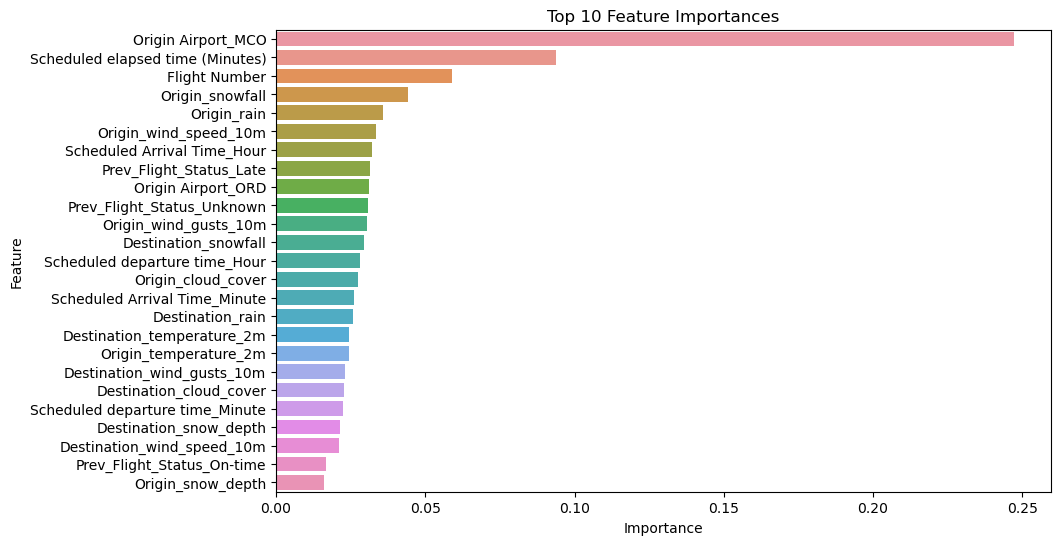

In [111]:
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_second.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:25])  # Display top 10 features
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [112]:
#Create a dataframe to predict the 'HS' variable and merge it with the actual 'HS' variable
test_output_second = pd.DataFrame(xgb_classifier.predict(X_test_second), index = X_test_second.index, columns = ['Pred_Flight_Status'])
test_output_second = test_output_second.merge(y_test_second, left_index = True, right_index = True)
test_output_second.head(25)

,Pred_Flight_Status,Flight_Status
5737,0,Late
4213,1,Early
6084,1,Late
698,0,Early
2786,0,Early
2202,0,Early
3432,0,Early
1032,0,On-time
2088,0,Early
3442,0,Early


In [113]:
test_output_second['Pred_Flight_Status'] = label_encoder.inverse_transform(test_output_second['Pred_Flight_Status'])
test_output_second.head()

,Pred_Flight_Status,Flight_Status
5737,Early,Late
4213,Late,Early
6084,Late,Late
698,Early,Early
2786,Early,Early


In [114]:
#Import the demand_pred_midterm.xlsx dataset as a dataframe
test_data_second = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/test_second_flight_data.xlsx')
test_data_second

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Prev_Flight_Status_Unknown,Prev_Flight_Status_On-time,Prev_Flight_Status_Late
0,2024-04-19,3402,ORD,19:59:00,22:52:00,02:53:00,0,0,0
1,2024-04-19,3402,ORD,19:59:00,22:52:00,02:53:00,0,1,0
2,2024-04-19,3402,ORD,19:59:00,22:52:00,02:53:00,0,0,1
3,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,0
4,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,1,0
5,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,1
6,2024-04-19,656,MCO,13:35:00,16:25:00,02:50:00,0,0,0
7,2024-04-19,656,MCO,13:35:00,16:25:00,02:50:00,0,1,0
8,2024-04-19,656,MCO,13:35:00,16:25:00,02:50:00,0,0,1
9,2024-04-20,3402,ORD,19:59:00,22:52:00,02:53:00,0,0,0


In [115]:
# Combining date and time columns into datetime objects
date_columns = ['Date (MM/DD/YYYY)']
time_columns = ['Scheduled departure time', 'Scheduled Arrival Time']

for col in time_columns:
    combined_datetime = test_data_second[date_columns[0]].astype(str) + ' ' + test_data_second[col].astype(str)
    test_data_second[col + ' rounded'] = pd.to_datetime(combined_datetime, errors='coerce').dt.round('H')

In [116]:
# Merge based on Scheduled Arrival Time (Destination Airport: SYR)
merged_data_syr_forecast_second = pd.merge(test_data_second, forecast_syr_weather, left_on=['Scheduled Arrival Time rounded'], 
                      right_on=['date'], how='inner')

# Select columns for merging
columns_to_merge = ['temperature_2m', 'rain', 'snowfall', 'snow_depth', 'cloud_cover', 'wind_speed_10m', 'wind_gusts_10m']

# Rename columns in merged datasets
merged_data_syr_forecast_second = merged_data_syr_forecast_second.rename(columns={col: f'Destination_{col}' for col in columns_to_merge})

In [117]:
merged_data_syr_forecast_second

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Prev_Flight_Status_Unknown,Prev_Flight_Status_On-time,Prev_Flight_Status_Late,Scheduled departure time rounded,Scheduled Arrival Time rounded,origin,date,Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m
0,2024-04-19,3402,ORD,19:59:00,22:52:00,02:53:00,0,0,0,2024-04-19 20:00:00,2024-04-19 23:00:00,SYR,2024-04-19 23:00:00,51.46,0.00,0,0,100,14.15,19.24
1,2024-04-19,3402,ORD,19:59:00,22:52:00,02:53:00,0,1,0,2024-04-19 20:00:00,2024-04-19 23:00:00,SYR,2024-04-19 23:00:00,51.46,0.00,0,0,100,14.15,19.24
2,2024-04-19,3402,ORD,19:59:00,22:52:00,02:53:00,0,0,1,2024-04-19 20:00:00,2024-04-19 23:00:00,SYR,2024-04-19 23:00:00,51.46,0.00,0,0,100,14.15,19.24
3,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,0,2024-04-19 15:00:00,2024-04-19 16:00:00,SYR,2024-04-19 16:00:00,54.40,0.00,0,0,100,9.06,22.82
4,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,1,0,2024-04-19 15:00:00,2024-04-19 16:00:00,SYR,2024-04-19 16:00:00,54.40,0.00,0,0,100,9.06,22.82
5,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,1,2024-04-19 15:00:00,2024-04-19 16:00:00,SYR,2024-04-19 16:00:00,54.40,0.00,0,0,100,9.06,22.82
6,2024-04-19,656,MCO,13:35:00,16:25:00,02:50:00,0,0,0,2024-04-19 14:00:00,2024-04-19 16:00:00,SYR,2024-04-19 16:00:00,54.40,0.00,0,0,100,9.06,22.82
7,2024-04-19,656,MCO,13:35:00,16:25:00,02:50:00,0,1,0,2024-04-19 14:00:00,2024-04-19 16:00:00,SYR,2024-04-19 16:00:00,54.40,0.00,0,0,100,9.06,22.82
8,2024-04-19,656,MCO,13:35:00,16:25:00,02:50:00,0,0,1,2024-04-19 14:00:00,2024-04-19 16:00:00,SYR,2024-04-19 16:00:00,54.40,0.00,0,0,100,9.06,22.82
9,2024-04-20,3402,ORD,19:59:00,22:52:00,02:53:00,0,0,0,2024-04-20 20:00:00,2024-04-20 23:00:00,SYR,2024-04-20 23:00:00,42.82,0.00,0,0,100,14.77,27.96


In [118]:
# Merge based on Scheduled Departure Time (Origin Airport: JFK)
merged_data_jfk_forecast_second = pd.merge(merged_data_syr_forecast_second, forecast_jfk_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'origin'], how='inner')

# Merge based on Scheduled Departure Time (Destination Airport: ORD)
merged_data_ord_forecast_second = pd.merge(merged_data_syr_forecast_second, forecast_ord_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'origin'], how='inner')

# Merge based on Scheduled Departure Time (Destination Airport: MCO)
merged_data_mco_forecast_second= pd.merge(merged_data_syr_forecast_second, forecast_mco_weather, left_on=['Scheduled departure time rounded', 'Origin Airport'], 
                      right_on=['date', 'origin'], how='inner')

# Select columns for merging
columns_to_merge = ['temperature_2m', 'rain', 'snowfall', 'snow_depth', 'cloud_cover', 'wind_speed_10m', 'wind_gusts_10m']

# Rename columns in merged datasets
merged_data_jfk_forecast_second = merged_data_jfk_forecast_second.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})
merged_data_mco_forecast_second = merged_data_mco_forecast_second.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})
merged_data_ord_forecast_second = merged_data_ord_forecast_second.rename(columns={col: f'Origin_{col}' for col in columns_to_merge})

In [119]:
# Concatenate the merged datasets
final_merged_test_second = pd.concat([merged_data_jfk_forecast_second, merged_data_ord_forecast_second, merged_data_mco_forecast_second], axis=0)

# Drop duplicate columns
final_merged_test_second = final_merged_test_second.loc[:, ~final_merged_test_second.columns.duplicated()]

# Drop unnecessary columns
final_merged_test_second.drop(columns=['date_x', 'date_y', 'origin_x', 'origin_y', 'Scheduled departure time rounded', 'Scheduled Arrival Time rounded'], inplace=True)
final_merged_test_second.head()

# Save final merged dataset to Excel
final_merged_test_second.to_excel("C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/Second_Weather_Integrated_Test_Data.xlsx", index=False)

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Prev_Flight_Status_Unknown,Prev_Flight_Status_On-time,Prev_Flight_Status_Late,Destination_temperature_2m,...,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,0,54.40,...,100,9.06,22.82,48.10,0.00,0,0,100,8.99,13.65
1,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,1,0,54.40,...,100,9.06,22.82,48.10,0.00,0,0,100,8.99,13.65
2,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,1,54.40,...,100,9.06,22.82,48.10,0.00,0,0,100,8.99,13.65
3,2024-04-20,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,0,49.30,...,100,13.04,25.95,58.59,0.00,0,0,100,5.27,11.41
4,2024-04-20,5182,JFK,14:55:00,16:21:00,01:26:00,0,1,0,49.30,...,100,13.04,25.95,58.59,0.00,0,0,100,5.27,11.41


In [120]:
# Import the ord weather dataset as a dataframe
second_flight_test_data = pd.read_excel('C:/Users/Akshaya Ganesan/Syracuse Docs/Spring 2024/Project/Final/Second_Weather_Integrated_Test_Data.xlsx')
second_flight_test_data.head()
second_flight_test_data.columns

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Prev_Flight_Status_Unknown,Prev_Flight_Status_On-time,Prev_Flight_Status_Late,Destination_temperature_2m,...,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m
0,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,0,54.40,...,100,9.06,22.82,48.10,0,0,0,100,8.99,13.65
1,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,1,0,54.40,...,100,9.06,22.82,48.10,0,0,0,100,8.99,13.65
2,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,1,54.40,...,100,9.06,22.82,48.10,0,0,0,100,8.99,13.65
3,2024-04-20,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,0,49.30,...,100,13.04,25.95,58.59,0,0,0,100,5.27,11.41
4,2024-04-20,5182,JFK,14:55:00,16:21:00,01:26:00,0,1,0,49.30,...,100,13.04,25.95,58.59,0,0,0,100,5.27,11.41


Index(['Date (MM/DD/YYYY)', 'Flight Number', 'Origin Airport',
       'Scheduled departure time', 'Scheduled Arrival Time', 'ELAPSED TIME',
       'Prev_Flight_Status_Unknown', 'Prev_Flight_Status_On-time',
       'Prev_Flight_Status_Late', 'Destination_temperature_2m',
       'Destination_rain', 'Destination_snowfall', 'Destination_snow_depth',
       'Destination_cloud_cover', 'Destination_wind_speed_10m',
       'Destination_wind_gusts_10m', 'Origin_temperature_2m', 'Origin_rain',
       'Origin_snowfall', 'Origin_snow_depth', 'Origin_cloud_cover',
       'Origin_wind_speed_10m', 'Origin_wind_gusts_10m'],
      dtype='object')

In [121]:
# Combining date and time columns into datetime objects
date_columns = ['Date (MM/DD/YYYY)']
time_columns = ['Scheduled departure time', 'Scheduled Arrival Time']

for col in time_columns:
    second_flight_test_data[col] = pd.to_datetime(second_flight_test_data[date_columns[0]].astype(str) + ' ' + second_flight_test_data[col].astype(str), errors='coerce')

# Extracting hour and minute from datetime columns
for col in time_columns:
    second_flight_test_data[col + '_Hour'] = second_flight_test_data[col].dt.hour
    second_flight_test_data[col + '_Minute'] = second_flight_test_data[col].dt.minute

In [122]:
# List of datetime columns to drop
unwanted_columns = ['Scheduled departure time', 'Scheduled Arrival Time']

# Drop datetime columns
second_flight_test_data.drop(columns=unwanted_columns, axis=1, inplace=True)

In [123]:
second_flight_test_data

,Date (MM/DD/YYYY),Flight Number,Origin Airport,ELAPSED TIME,Prev_Flight_Status_Unknown,Prev_Flight_Status_On-time,Prev_Flight_Status_Late,Destination_temperature_2m,Destination_rain,Destination_snowfall,...,Origin_rain,Origin_snowfall,Origin_snow_depth,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute
0,2024-04-19,5182,JFK,01:26:00,0,0,0,54.40,0.00,0,...,0,0,0,100,8.99,13.65,14,55,16,21
1,2024-04-19,5182,JFK,01:26:00,0,1,0,54.40,0.00,0,...,0,0,0,100,8.99,13.65,14,55,16,21
2,2024-04-19,5182,JFK,01:26:00,0,0,1,54.40,0.00,0,...,0,0,0,100,8.99,13.65,14,55,16,21
3,2024-04-20,5182,JFK,01:26:00,0,0,0,49.30,0.00,0,...,0,0,0,100,5.27,11.41,14,55,16,21
4,2024-04-20,5182,JFK,01:26:00,0,1,0,49.30,0.00,0,...,0,0,0,100,5.27,11.41,14,55,16,21
5,2024-04-20,5182,JFK,01:26:00,0,0,1,49.30,0.00,0,...,0,0,0,100,5.27,11.41,14,55,16,21
6,2024-04-21,5182,JFK,01:26:00,0,0,0,44.80,0.00,0,...,0,0,0,5,10.31,13.87,14,55,16,21
7,2024-04-21,5182,JFK,01:26:00,0,1,0,44.80,0.00,0,...,0,0,0,5,10.31,13.87,14,55,16,21
8,2024-04-21,5182,JFK,01:26:00,0,0,1,44.80,0.00,0,...,0,0,0,5,10.31,13.87,14,55,16,21
9,2024-04-22,5182,JFK,01:26:00,0,0,0,53.62,0.00,0,...,0,0,0,0,5.16,6.04,14,55,16,21


In [124]:
def convert_to_minutes_second(elapsed_time):
    parts = elapsed_time.split(':')
    hours, minutes = map(int, parts[:2])  # Extract only hours and minutes
    total_minutes = hours * 60 + minutes
    return total_minutes

In [125]:
second_flight_test_data['Scheduled elapsed time (Minutes)'] = second_flight_test_data['ELAPSED TIME'].apply(convert_to_minutes_second)
second_flight_test_data.drop(columns = 'ELAPSED TIME', inplace = True)

In [126]:
second_flight_test_data = get_ohe(second_flight_test_data, 'Origin Airport')
second_flight_test_data.head()

,Date (MM/DD/YYYY),Flight Number,Prev_Flight_Status_Unknown,Prev_Flight_Status_On-time,Prev_Flight_Status_Late,Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,...,Origin_cloud_cover,Origin_wind_speed_10m,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Scheduled elapsed time (Minutes),Origin Airport_MCO,Origin Airport_ORD
0,2024-04-19,5182,0,0,0,54.40,0.00,0,0,100,...,100,8.99,13.65,14,55,16,21,86,0,0
1,2024-04-19,5182,0,1,0,54.40,0.00,0,0,100,...,100,8.99,13.65,14,55,16,21,86,0,0
2,2024-04-19,5182,0,0,1,54.40,0.00,0,0,100,...,100,8.99,13.65,14,55,16,21,86,0,0
3,2024-04-20,5182,0,0,0,49.30,0.00,0,0,100,...,100,5.27,11.41,14,55,16,21,86,0,0
4,2024-04-20,5182,0,1,0,49.30,0.00,0,0,100,...,100,5.27,11.41,14,55,16,21,86,0,0


In [127]:
test_data_reordered_second = second_flight_test_data[X_train_second.columns]

In [128]:
test_data_reordered_second.head()

,Flight Number,Scheduled elapsed time (Minutes),Destination_temperature_2m,Destination_rain,Destination_snowfall,Destination_snow_depth,Destination_cloud_cover,Destination_wind_speed_10m,Destination_wind_gusts_10m,Origin_temperature_2m,...,Origin_wind_gusts_10m,Scheduled departure time_Hour,Scheduled departure time_Minute,Scheduled Arrival Time_Hour,Scheduled Arrival Time_Minute,Origin Airport_MCO,Origin Airport_ORD,Prev_Flight_Status_Late,Prev_Flight_Status_On-time,Prev_Flight_Status_Unknown
0,5182,86,54.40,0.00,0,0,100,9.06,22.82,48.10,...,13.65,14,55,16,21,0,0,0,0,0
1,5182,86,54.40,0.00,0,0,100,9.06,22.82,48.10,...,13.65,14,55,16,21,0,0,0,1,0
2,5182,86,54.40,0.00,0,0,100,9.06,22.82,48.10,...,13.65,14,55,16,21,0,0,1,0,0
3,5182,86,49.30,0.00,0,0,100,13.04,25.95,58.59,...,11.41,14,55,16,21,0,0,0,0,0
4,5182,86,49.30,0.00,0,0,100,13.04,25.95,58.59,...,11.41,14,55,16,21,0,0,0,1,0


In [129]:
test_data_reordered_second = pd.DataFrame(sc.fit_transform(test_data_reordered_second), columns = test_data_reordered_second.columns, index = test_data_reordered_second.index)

In [131]:
#Create a dataframe to predict the 'HS' variable and merge it with the actual 'HS' variable
test_output_final_second = pd.DataFrame(xgb_classifier.predict(test_data_reordered_second), index = test_data_reordered_second.index, columns = ['Flight Status'])
test_output_final_second.head(25)

,Flight Status
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [133]:
test_output_final_second['Flight Status'] = label_encoder.inverse_transform(test_output_final_second['Flight Status'])
test_output_final_second.head()

,Flight Status
0,Early
1,Early
2,Early
3,Early
4,Early


In [134]:
test_output_final_second = test_output_final_second.merge(test_data_second, left_index = True, right_index = True)
test_output_final_second

,Flight Status,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled departure time,Scheduled Arrival Time,ELAPSED TIME,Prev_Flight_Status_Unknown,Prev_Flight_Status_On-time,Prev_Flight_Status_Late,Scheduled departure time rounded,Scheduled Arrival Time rounded
0,Early,2024-04-19,3402,ORD,19:59:00,22:52:00,02:53:00,0,0,0,2024-04-19 20:00:00,2024-04-19 23:00:00
1,Early,2024-04-19,3402,ORD,19:59:00,22:52:00,02:53:00,0,1,0,2024-04-19 20:00:00,2024-04-19 23:00:00
2,Early,2024-04-19,3402,ORD,19:59:00,22:52:00,02:53:00,0,0,1,2024-04-19 20:00:00,2024-04-19 23:00:00
3,Early,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,0,2024-04-19 15:00:00,2024-04-19 16:00:00
4,Early,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,1,0,2024-04-19 15:00:00,2024-04-19 16:00:00
5,Early,2024-04-19,5182,JFK,14:55:00,16:21:00,01:26:00,0,0,1,2024-04-19 15:00:00,2024-04-19 16:00:00
6,Early,2024-04-19,656,MCO,13:35:00,16:25:00,02:50:00,0,0,0,2024-04-19 14:00:00,2024-04-19 16:00:00
7,Early,2024-04-19,656,MCO,13:35:00,16:25:00,02:50:00,0,1,0,2024-04-19 14:00:00,2024-04-19 16:00:00
8,Early,2024-04-19,656,MCO,13:35:00,16:25:00,02:50:00,0,0,1,2024-04-19 14:00:00,2024-04-19 16:00:00
9,Early,2024-04-20,3402,ORD,19:59:00,22:52:00,02:53:00,0,0,0,2024-04-20 20:00:00,2024-04-20 23:00:00
